<div style="display: flex; background-color: RGB(0,0,139);" >
<h1 style="margin: auto; padding: 30px;color: RGB(0,0,255);text-align : center ">ÉTUDE DE MARCHÉ EXPORT LA POULE QUI CHANTE - partie 1<br>Exploration et transformation des données</h1>
</div>

# Contexte de cette étude

Mission en tant qu’analyste chez La poule qui chante, une entreprise française d’agroalimentaire. Son activité principale est l’élevage et la vente de poulets sous le label “Poulet Agriculture Biologique”. 

Son activité actuelle est franco-française mais la direction de l’entreprise souhaite évaluer la possibilité de se développer à l'international. A ce stade, le champ des possibles est large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Cette étude doit permettre de faire des propositions. 

# Données collectées
Les sources sont principalement WorldBank et la FAO.

+ Tables concernant la richesse des pays (revenu intérieur brut par habitant, taux de croissance du PIB par habitant, taux de croissance annuel)
+ Tables liées au commerce (score doing_business, commerce transfontalier, droits de douane, score logistique)
+ Tables concernant la population (chiffres, croissance, % de population urbaine, évolution de la population urbaine et espérance de vie)
+ Tables concernant l'alimentation (disponibilité liée à la viande de volailles, % non-accès à une alimentatione saine)
+ Tables sur la situation politique (score de stabilité poilitique et score de paix)


# Objectif de l'analyse
Cette analyse est découpée en deux parties et doit permettre de faire des préconisations de pays où s'étendre commercialement.

+ **Nettoyage et transformation des données puis analyse exploratoire univariée et constitution d'un dataset unique,**
+ Partie analytique en réalisant une ACP avec réduction des dimensions et un clustering (CAH puis K-means) -> cette partie sera réalisée dans un second notebook.

# Livrables
+ Notebooks
+ Présentation au CODIR.

# Table des matières
* [Etape 1 Importation des librairies et chargement des fichiers](#Etape_1)
    * [Section 1.1 Importation des librairies](#section_1_1)
    * [Section 1.2 Chargement des fichiers](#section_1_2)
* [Etape 2 Analyse exploratoire des fichiers](#Etape2)
    * [Section 2.1 Table Revenu par habitant 2022](#section_2_1)
    * [Section 2.2 Table Taux de croissance du revenu par habitant 2022](#section_2_2)
    * [Section 2.3 Table Taux de croissance annuel 2022](#section_2_3)
    * [Section 2.4 Table Business Score 2019](#section_2_4)
    * [Section 2.5 Table Commerce Transfontalier 2019](#section_2_5)
    * [Section 2.6 Table Droits de douane 2021](#section_2_6)
    * [Section 2.7 Table Score logistique 2018](#section_2_7)
    * [Section 2.8 Table Population 2023](#section_2_8)
    * [Section 2.9 Table Croissance de la population 2023](#section_2_9)
    * [Section 2.10 Table Part de la population urbaine 2023](#section_2_10)
    * [Section 2.11 Table de l'évolution de la population urbaine 2023](#section_2_11)
    * [Section 2.12 Table de l'espérance de vie à la naissance 2022](#section_2_12)
    * [Section 2.13 Table de la disponibilité des produits de viande de volailles 2022](#section_2_13)
    * [Section 2.14 Table sur le non-accès à l'alimentation saine en 2022](#section_2_14)
    * [Section 2.15 Table sur l'indice de stabilité politique en 2022](#section_2_15)
    * [Section 2.16 Table sur les catégories de revenus des pays](#section_2_16)
* [Etape 3 Homogénéiser les colonnes clés des Pays](#Etape_3)
    * [Section 3.1 Créer une table de correspondance](#section_3_1)
    * [Section 3.2 Standardiser les noms dans tous les fichiers](#section_3_2)
* [Etape 4 Fusionner les tables](#Etape_4)
    * [Section 4.1 Fusion de 2 premières tables](#section_4_1)
        * [Sous-section 4.1.1 Ajout de colonnes calculées](#sub_section_4_1_1)
    * [Section 4.2 Fusion de toutes les autres tables](#section_4_2)  
* [Etape 5 Vérification du nouveau dataframe complet](#Etape_5)  
  * [Section 5.1 Exploration du dataset complet](#section_5_1)
  * [Section 5.2 Vérification de la couverture de l'échantillon](#section_5_2)

<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2><a class="anchor" id="Etape_1"></a>
</div>

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">1.1 - Importation des librairies</h3>
<a id="section_1_1"></a>
</div>

In [1]:
#Importation des librairies utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">1.2 - Chargements des fichiers</h3>
<a id="section_1_2"></a>
</div>

In [2]:
#Importation du fichier Revenu par habitant 2022
df_revenuparhabitant = pd.read_csv("revenuparhabitant2022.csv", sep=";")
#Importation du fichier taux de croissance du Revenu par habitant 2022
df_croissance_revenuparhabitant = pd.read_csv("revenuparhabitant_taux_2021.csv", sep=";")
#Importation du fichier taux de croissance 2022
df_taux_croissance = pd.read_csv("Taux_croissance_annuel2022.csv", sep=";")
#Importation du fichier Doing business 2019
df_business_score = pd.read_csv("Doing_business2019.csv", sep=";")
#Importation du fichier commerce transfontalier 2019
df_commerce_transfontalier = pd.read_csv("commerce_transfontalier2019.csv", sep=";")
#Importation du fichier droits de douane 2021
df_droitsdedouane = pd.read_csv("droits_douane2021.csv", sep=";")
#Importation du fichier score logistique 2018
df_score_logistique = pd.read_csv("score_logistique_2018.csv", sep=";")
#Importation du fichier population 2023
df_population = pd.read_csv("population_2023.csv", sep=";")
#Importation du fichier croissance population 2023
df_croissance_pop = pd.read_csv("Croissance_pop2023.csv", sep=";")
#Importation du fichier % population urbaine 2023
df_pop_urbaine = pd.read_csv("popurbaine%2023.csv", sep=";")
#Importation du fichier évolution population urbaine 2023
df_evol_pop_urbaine = pd.read_csv("popurbaine_evol_2023.csv", sep=";")
#Importation du fichier évolution espérance de vie 2022
df_esperancedevie = pd.read_csv("esperance_de_vie2022.csv", sep=";")
#Importation du fichier disponibilité viande volailles 2022
df_dispo_volailles = pd.read_csv("disponibilite_viande_volailles2022.csv", sep=";")
#Importation du fichier non-acces alimentation saine 2022
df_healthyfood = pd.read_csv("No_acces_alimentation_saine2022.csv", sep=";")
#Importation du fichier stabilité politique 2022
df_stabilitepolitique = pd.read_csv("Stabilite_politique_2022.csv", sep=";")
#Importation du fichier indice de paix 2024
df_indice_paix = pd.read_csv("Global_peace_index2024.csv", sep=";")
#Importation du fichier catégories de revenus des pays
df_categories_revenus = pd.read_csv("Pays_categorie_revenus.csv", sep=";")

<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
<a id="Etape2"></a>
</div>

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.1 - Analyse exploratoire du fichier Revenu par habitant</h3>
<a id="section_2_1"></a>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observations".format(df_revenuparhabitant.shape[0]))
print("Le tableau comporte {} colonnes".format(df_revenuparhabitant.shape[1]))

Le tableau comporte 242 observations
Le tableau comporte 2 colonnes


In [4]:
#Afficher la nature des données dans chacune des colonnes
print(df_revenuparhabitant.dtypes)

Pays               object
GDP_per_capita    float64
dtype: object


In [5]:
# Arrondir les valeurs avant de les convertir en entiers
df_revenuparhabitant['GDP_per_capita'] = df_revenuparhabitant['GDP_per_capita'].round().astype(int)

In [6]:
#Afficher les 5 premières lignes de la table
df_revenuparhabitant.head(5)

,Pays,GDP_per_capita
0,Aruba,45236
1,Africa Eastern and Southern,4294
2,Afghanistan,2093
3,Africa Western and Central,5156
4,Angola,7929


In [7]:
#Afficher les  dernières lignes
df_revenuparhabitant.tail(5)

,Pays,GDP_per_capita
237,Samoa,6057
238,Kosovo,13939
239,South Africa,15331
240,Zambia,3865
241,Zimbabwe,3661


In [8]:
#Observer le nombre de valeurs manquantes dans chacune des colonnes
df_revenuparhabitant_nan = df_revenuparhabitant.isnull().sum()
print(f'Il y a {df_revenuparhabitant_nan} valeurs manquantes dans le dataset.')

Il y a Pays              0
GDP_per_capita    0
dtype: int64 valeurs manquantes dans le dataset.


In [9]:
#Regarder si il y a les lignes en doublons dans la colonne pays
df_doublons = df_revenuparhabitant['Pays'].duplicated()
print(df_doublons.any())

False


In [10]:
#Observer les valeurs de distribution du revenu par habitant
print(df_revenuparhabitant['GDP_per_capita'].describe())

count       242.000000
mean      26875.417355
std       27161.340378
min         918.000000
25%        6261.500000
50%       17830.500000
75%       41032.250000
max      146457.000000
Name: GDP_per_capita, dtype: float64


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


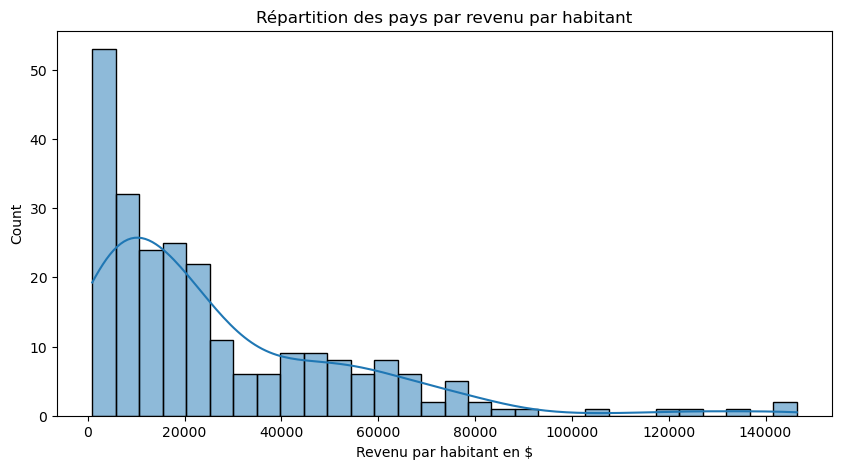

In [11]:
#Représenter la distribution des revenus par habitant
plt.figure(figsize=(10, 5))
sns.histplot(df_revenuparhabitant['GDP_per_capita'], kde=True, bins=30)
plt.title('Répartition des pays par revenu par habitant')
plt.xlabel('Revenu par habitant en $')
plt.show()

In [12]:
#Analyser la normalité de la distribution
revenu_par_habitant = df_revenuparhabitant['GDP_per_capita']
W, p = st.shapiro(revenu_par_habitant)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.8145284652709961, p-value: 2.747627708918365e-16
La distribution ne suit pas une loi normale.


In [13]:
# Considérer la distribution : calcul du skewness (asymétrie) et du kurtosis (aplatissement)
skewness = st.skew(df_revenuparhabitant['GDP_per_capita'])
kurtosis = st.kurtosis(df_revenuparhabitant['GDP_per_capita'],fisher=False) #Vrai kurtosis (non excessive ou brute). Une distribution normale a une kurtosis brute de 3.
excess_kurtosis = st.kurtosis(df_revenuparhabitant['GDP_per_capita'])#kurtosis excessive (Fisher=True par défaut) cad kurtosis brute moins 3.
#Une distribution normale a une kurtosis excessive de 0
print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Excès de kurtosis: {excess_kurtosis}")

Skewness: 1.7448861744787314
Kurtosis réel: 6.6058197021547445
Excès de kurtosis: 3.6058197021547445


- Skewness > 0 : petit étalement vers la droite
- Excès de Kurtosis < 0 : plus aplatie que loi normale et donc observations moins concentrées.

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.2 - Analyse exploratoire du fichier Taux de croissance du revenu par habitant 2022</h3>
<a id="section_2_2"></a>
</div>

In [14]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observations".format(df_croissance_revenuparhabitant.shape[0]))
print("Le tableau comporte {} colonnes".format(df_croissance_revenuparhabitant.shape[1]))

Le tableau comporte 255 observations
Le tableau comporte 2 colonnes


In [15]:
#Afficher les 5 premières lignes de la table
df_croissance_revenuparhabitant.head(5)

,Pays,GDP_per_capita_growth%
0,Aruba,27.696865
1,Africa Eastern and Southern,1.841882
2,Afghanistan,-22.966942
3,Africa Western and Central,1.385815
4,Angola,-1.954598


In [16]:
#Afficher la nature des données dans chacune des colonnes
print(df_croissance_revenuparhabitant.dtypes)

Pays                       object
GDP_per_capita_growth%    float64
dtype: object


In [17]:
#Observer s'il y a des valeurs manquantes dans chacune des colonnes
df_croissance_revenuparhabitant_nan = df_croissance_revenuparhabitant.isnull().sum()
print(df_croissance_revenuparhabitant_nan)

Pays                      0
GDP_per_capita_growth%    0
dtype: int64


In [18]:
#Regarder si il y a les lignes en doublons dans la colonne client_id
df_croissance_revenuparhabitant_nan_doublons = df_croissance_revenuparhabitant['Pays'].duplicated()
print(df_croissance_revenuparhabitant_nan_doublons.any())

False


In [19]:
#Observer les valeurs de distribution du revenu par habitant
print(df_croissance_revenuparhabitant['GDP_per_capita_growth%'].describe())

count    255.000000
mean       5.189100
std       10.717942
min      -22.966942
25%        1.672024
50%        4.414695
75%        6.943412
max      150.431471
Name: GDP_per_capita_growth%, dtype: float64


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


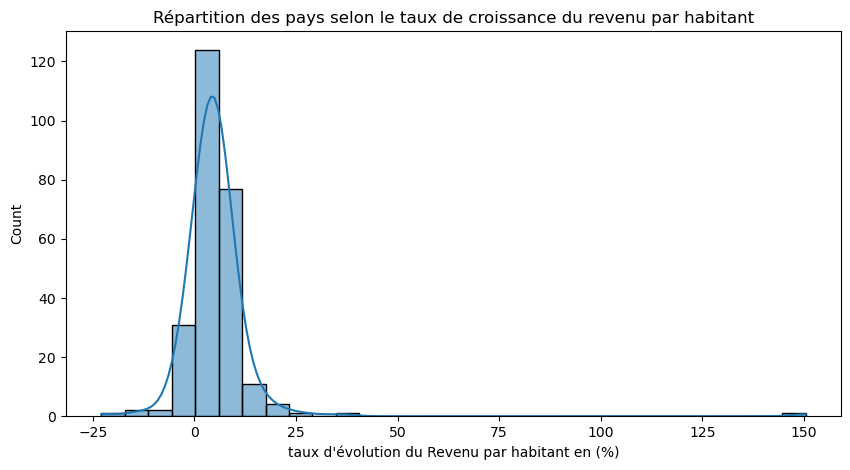

In [20]:
#Représenter la distribution du taux de croissance du revenu par habitant
plt.figure(figsize=(10, 5))
sns.histplot(df_croissance_revenuparhabitant['GDP_per_capita_growth%'], kde=True, bins=30)
plt.title('Répartition des pays selon le taux de croissance du revenu par habitant')
plt.xlabel('taux d\'évolution du Revenu par habitant en (%)')
plt.show()

In [21]:
# Regarder si la distribution suit une loi normale
croissance_revenus = df_croissance_revenuparhabitant['GDP_per_capita_growth%']
W, p = st.shapiro(croissance_revenus)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.41639983654022217, p-value: 5.909242255585914e-28
La distribution ne suit pas une loi normale.


In [22]:
# Considérer la distribution : calcul du skewness (asymétrie) et du kurtosis (aplatissement)
skewness = st.skew(df_croissance_revenuparhabitant['GDP_per_capita_growth%'])
kurtosis = st.kurtosis(df_croissance_revenuparhabitant['GDP_per_capita_growth%'],fisher=False) #Vrai kurtosis (non excessive ou brute). Une distribution normale a une kurtosis brute de 3.
excess_kurtosis = st.kurtosis(df_croissance_revenuparhabitant['GDP_per_capita_growth%'])#kurtosis excessive (Fisher=True par défaut) cad kurtosis brute moins 3.
#Une distribution normale a une kurtosis excessive de 0
print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Excès de kurtosis: {excess_kurtosis}")

Skewness: 9.851674231530733
Kurtosis réel: 134.03754678952834
Excès de kurtosis: 131.03754678952834


Skewness > 0 : non symétrique car étalement vers la droite.

Excès de Kurtosis > 0 : plus aplatie que loi normale et donc observations moins concentrées.
La distribution des données a des queues plus épaisses et un pic plus élevé que la distribution normale. 
Il y a plus de valeurs extrêmes (outliers) que dans une distribution normale.

In [23]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_croissance_revenuparhabitant['GDP_per_capita_growth%'].quantile(0.25)
Q3 = df_croissance_revenuparhabitant['GDP_per_capita_growth%'].quantile(0.75)
IQR = Q3 - Q1

print(f"L'IQR pour 'GDP_per_capita_growth%' est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR

print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

L'IQR pour 'GDP_per_capita_growth%' est : 5.271387682400725
Borne inférieure : -6.235057108950673
Borne supérieure : 14.850493620652227


In [24]:
# Filtrer les valeurs extrêmes
valeurs_extremes = df_croissance_revenuparhabitant[
    (df_croissance_revenuparhabitant['GDP_per_capita_growth%'] < borne_inferieure) |
    (df_croissance_revenuparhabitant['GDP_per_capita_growth%'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_croissance_revenuparhabitant['GDP_per_capita_growth%'].shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

Nombre de valeurs extrêmes : 14
Part des valeurs extrêmes : 5.49%


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.3 - Analyse exploratoire du fichier Taux de croissance annuel</h3>
<a id="section_2_3"></a>
</div>

In [25]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_taux_croissance.shape[0]))
print("Le tableau comporte {} colonnes".format(df_taux_croissance.shape[1]))

Le tableau comporte 248 lignes
Le tableau comporte 2 colonnes


In [26]:
#Afficher les 5 premières lignes de la table
df_taux_croissance.head(5)

,Pays,Taux_croissancePIB
0,Afghanistan,-6.240172
1,Albania,4.856402
2,Algeria,3.600000
3,American Samoa,1.735016
4,Andorra,9.563798


In [27]:
#Afficher la nature des données dans chacune des colonnes
print(df_taux_croissance.dtypes)

Pays                   object
Taux_croissancePIB    float64
dtype: object


In [28]:
#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_taux_croissance.isnull().sum()
print(nan)

Pays                  0
Taux_croissancePIB    0
dtype: int64


In [29]:
#Regarder si il y a des doublons dans la colonne pays
doublons = df_taux_croissance['Pays'].duplicated()
print(doublons.any())

False


In [30]:
#Observer les valeurs de distribution des prix
print(df_taux_croissance['Taux_croissancePIB'].describe())

count    248.000000
mean       4.390401
std        6.120353
min      -28.758591
25%        2.610494
50%        4.094894
75%        5.762319
max       63.439864
Name: Taux_croissancePIB, dtype: float64


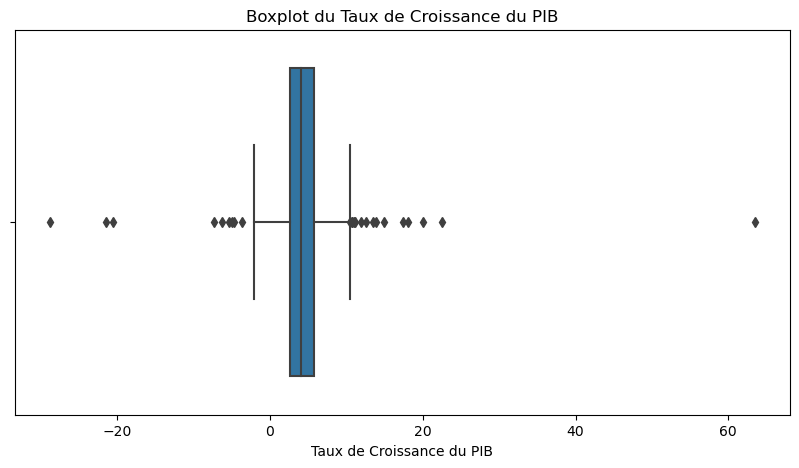

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_taux_croissance['Taux_croissancePIB'])
plt.title('Boxplot du Taux de Croissance du PIB')
plt.xlabel('Taux de Croissance du PIB')
plt.show()

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


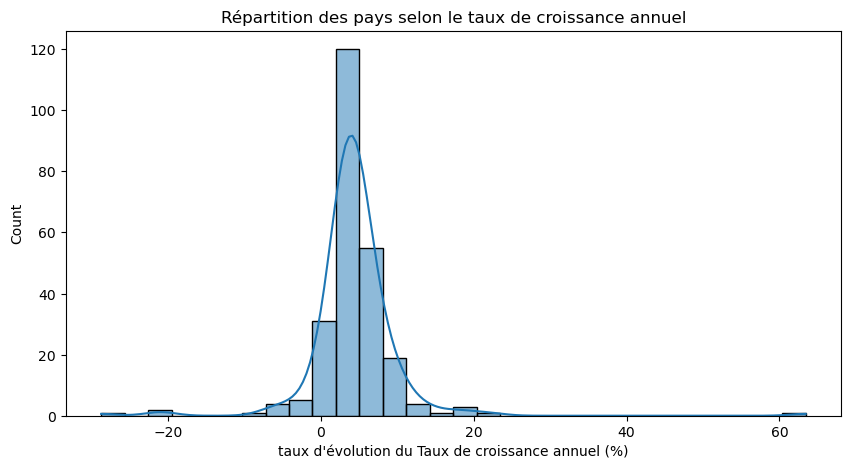

In [32]:
#Représenter la distribution du taux de croissance annuel
plt.figure(figsize=(10, 5))
sns.histplot(df_taux_croissance['Taux_croissancePIB'], kde=True, bins=30)
plt.title('Répartition des pays selon le taux de croissance annuel')
plt.xlabel('taux d\'évolution du Taux de croissance annuel (%)')
plt.show()

In [33]:
# Regarder si la distribution suit une loi normale
croissance_PIB = df_taux_croissance['Taux_croissancePIB']
W, p = st.shapiro(croissance_PIB)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.6382563710212708, p-value: 1.3203836449086599e-22
La distribution ne suit pas une loi normale.


In [34]:
#Considérer la distribution : calcul du skewness (asymétrie) et du kurtosis (aplatissement)
skewness = st.skew(df_taux_croissance['Taux_croissancePIB'])
kurtosis = st.kurtosis(df_taux_croissance['Taux_croissancePIB'],fisher=False) #Vrai kurtosis (non excessive ou brute). Une distribution normale a une kurtosis brute de 3.
excess_kurtosis = st.kurtosis(df_taux_croissance['Taux_croissancePIB'])#kurtosis excessive (Fisher=True par défaut) cad kurtosis brute moins 3.
#Une distribution normale a une kurtosis excessive de 0
print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Excès de kurtosis: {excess_kurtosis}")

Skewness: 2.65456810764483
Kurtosis réel: 42.15490533792516
Excès de kurtosis: 39.15490533792516


- Skewness > 0 : petit étalement vers la droite.
- Excès de Kurtosis > 0 : La distribution a un pic beaucoup plus élevé que celui d'une distribution normale. Les valeurs sont très concentrées autour de la moyenne, mais avec des valeurs extrêmes fréquentes.

In [35]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_taux_croissance['Taux_croissancePIB'].quantile(0.25)
Q3 = df_taux_croissance['Taux_croissancePIB'].quantile(0.75)
IQR = Q3 - Q1

print(f"L'IQR pour 'Taux de croissance PIB annuel' est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR

print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

L'IQR pour 'Taux de croissance PIB annuel' est : 3.1518245143367825
Borne inférieure : -2.117242480383829
Borne supérieure : 10.4900555769633


In [36]:
# Considérer les valeurs extrêmes
valeurs_extremes = df_taux_croissance[
    (df_taux_croissance['Taux_croissancePIB'] < borne_inferieure) |
    (df_taux_croissance['Taux_croissancePIB'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_taux_croissance['Taux_croissancePIB'].shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

Nombre de valeurs extrêmes : 24
Part des valeurs extrêmes : 9.68%


In [37]:
# Filtrer les pays avec un taux de croissance > 60 et > -20
pays_filtrés = df_taux_croissance[
    (df_taux_croissance['Taux_croissancePIB'] > 60) | 
    (df_taux_croissance['Taux_croissancePIB'] < -20)
][['Pays', 'Taux_croissancePIB']]

# Afficher les pays filtrés
print(pays_filtrés)

                 Pays  Taux_croissancePIB
92             Guyana           63.439864
138  Macao SAR, China          -21.401951
225       Timor-Leste          -20.541587
235           Ukraine          -28.758591


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.4 - Analyse exploratoire du fichier BusinessScore 2019</h3>
<a id="section_2_4"></a>
</div>

In [39]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_business_score.shape[0]))
print("Le tableau comporte {} colonnes".format(df_business_score.shape[1]))

Le tableau comporte 191 lignes
Le tableau comporte 2 colonnes


In [40]:
#Afficher les 5 premières lignes de la table
df_business_score

,Pays,score_facilite_business
0,Afghanistan,44.06497
1,Albania,67.74847
2,Algeria,48.59758
3,Angola,41.28838
4,Antigua and Barbuda,60.28342
...,...,...
186,Vietnam,69.76594
187,West Bank and Gaza,59.97873
188,"Yemen, Rep.",31.76299
189,Zambia,66.93648


In [41]:
#Regarder si il y a les lignes en doublons dans la colonne Pays
doublons = df_business_score['Pays'].duplicated()
print(doublons.any())

False


In [42]:
#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_business_score.isnull().sum()
print(nan)

Pays                       0
score_facilite_business    0
dtype: int64


In [43]:
#Regarder type de données
print(df_business_score.dtypes)

Pays                        object
score_facilite_business    float64
dtype: object


In [44]:
#Observer les valeurs de distribution des prix
print(df_business_score['score_facilite_business'].describe())

count    191.000000
mean      63.053012
std       13.863593
min       20.039580
25%       54.359165
50%       62.829430
75%       74.341020
max       86.764650
Name: score_facilite_business, dtype: float64


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


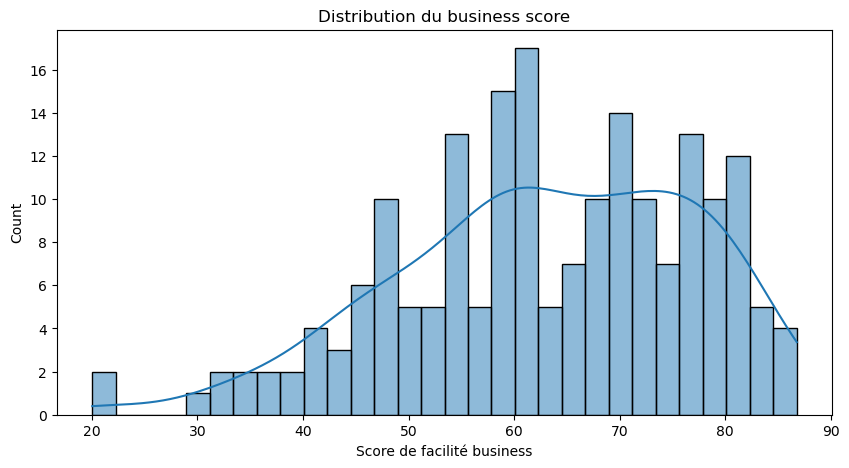

In [45]:
#Représenter la distribution du score
plt.figure(figsize=(10, 5))
sns.histplot(df_business_score['score_facilite_business'], kde=True, bins=30)
plt.title('Distribution du business score')
plt.xlabel('Score de facilité business')
plt.show()

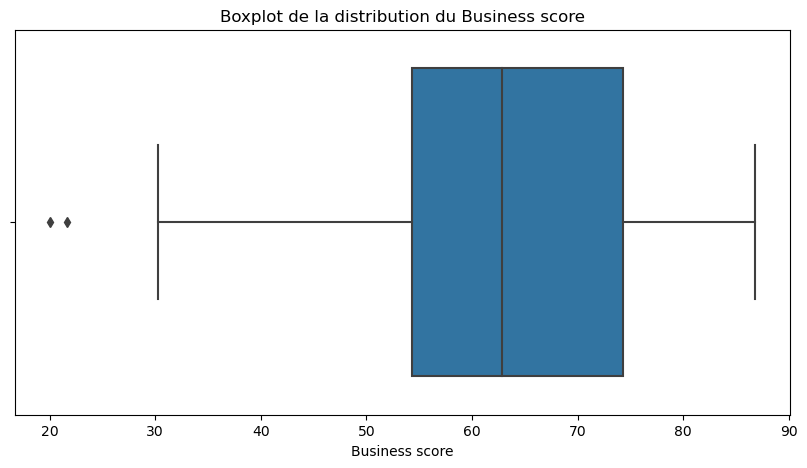

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_business_score['score_facilite_business'])
plt.title('Boxplot de la distribution du Business score')
plt.xlabel('Business score')
plt.show()

In [47]:
#Analyser la normalité de la distribution
business_score = df_business_score['score_facilite_business']
W, p = st.shapiro(business_score)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.9703874588012695, p-value: 0.0004527549899648875
La distribution ne suit pas une loi normale.


In [48]:
#Considérer la distribution : calcul du skewness (asymétrie) et du kurtosis (aplatissement)
skewness = st.skew(business_score)
kurtosis = st.kurtosis(business_score,fisher=False) 
excess_kurtosis = st.kurtosis(business_score)

print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Excès de kurtosis: {excess_kurtosis}")

Skewness: -0.507859704465624
Kurtosis réel: 2.7974496124780783
Excès de kurtosis: -0.20255038752192167


- la distribution des données est légèrement asymétrique vers la gauche, il y a une tendance à avoir plus de valeurs inférieures à la moyenne. 
- L’excès de kurtosis de -0.2026 (négatif) indique que la distribution a un pic moins prononcé et des queues légèrement moins épaisses que la distribution normale.

In [49]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_business_score['score_facilite_business'].quantile(0.25)
Q3 = df_business_score['score_facilite_business'].quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour le Business Score est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_business_score[
    (df_business_score['score_facilite_business'] < borne_inferieure) |
    (df_business_score['score_facilite_business'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = business_score.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour le Business Score est : 19.981854999999996
Borne inférieure : 24.38638250000001
Borne supérieure : 104.3138025
Nombre de valeurs extrêmes : 2
Part des valeurs extrêmes : 1.05%


In [50]:
#Pays avec business score en valeurs extrêmes
valeurs_extremes[['Pays', 'score_facilite_business']]

,Pays,score_facilite_business
52,Eritrea,21.59980
154,Somalia,20.03958


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.5 - Analyse exploratoire du fichier Commerce transfontalier 2019</h3>
<a id="section_2_5"></a>
</div>

In [51]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_commerce_transfontalier.shape[0]))
print("Le tableau comporte {} colonnes".format(df_commerce_transfontalier.shape[1]))

Le tableau comporte 189 lignes
Le tableau comporte 2 colonnes


In [52]:
df_commerce_transfontalier

,Pays,Trading_accross_borders
0,Afghanistan,30.63301
1,Albania,96.29094
2,Algeria,38.42879
3,Angola,36.15152
4,Antigua and Barbuda,68.72541
...,...,...
184,Vanuatu,59.13408
185,Vietnam,70.82859
186,West Bank and Gaza,86.67132
187,Zambia,56.87656


In [53]:
#Regarder type de données
print(df_commerce_transfontalier.dtypes)

Pays                        object
Trading_accross_borders    float64
dtype: object


In [54]:
#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_commerce_transfontalier.isnull().sum()
print(nan)

Pays                       0
Trading_accross_borders    0
dtype: int64


In [55]:
#Regarder si il y a les lignes en doublons dans la colonne Pays
doublons = df_commerce_transfontalier['Pays'].duplicated()
print(doublons.any())

False


In [56]:
#Observer les mesures sur les données
df_commerce_transfontalier.describe()

,Trading_accross_borders
count,189.000000
mean,72.201784
std,21.329055
min,0.000000
25%,60.946520
50%,73.835430
75%,89.567520
max,100.000000


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


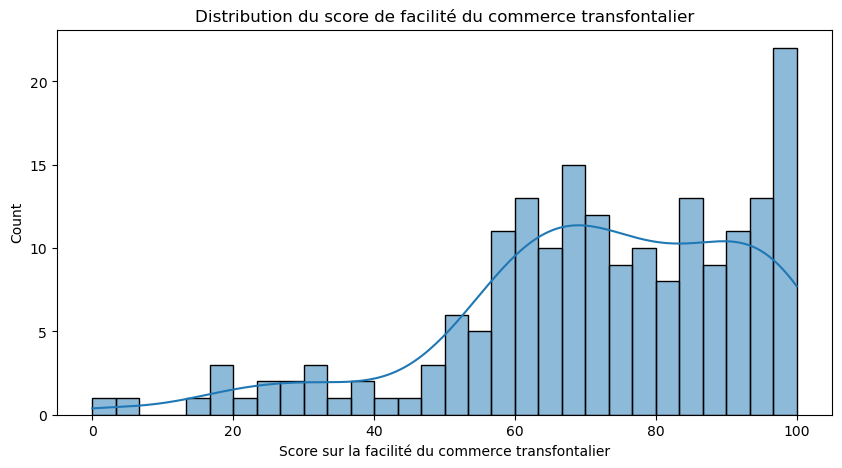

In [57]:
#Représenter la distribution du score
plt.figure(figsize=(10, 5))
sns.histplot(df_commerce_transfontalier['Trading_accross_borders'], kde=True, bins=30)
plt.title('Distribution du score de facilité du commerce transfontalier')
plt.xlabel('Score sur la facilité du commerce transfontalier')
plt.show()

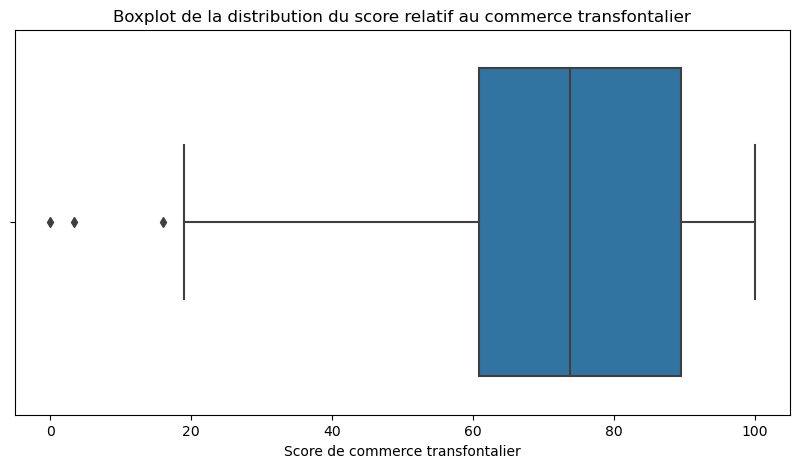

In [58]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_commerce_transfontalier['Trading_accross_borders'])
plt.title('Boxplot de la distribution du score relatif au commerce transfontalier')
plt.xlabel('Score de commerce transfontalier')
plt.show()

In [59]:
#Analyser la normalité de la distribution
commerce_score = df_commerce_transfontalier['Trading_accross_borders']
W, p = st.shapiro(commerce_score)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.9327659606933594, p-value: 1.1283098189096563e-07
La distribution ne suit pas une loi normale.


In [60]:
#Considérer la distribution : calcul du skewness (asymétrie) et du kurtosis (aplatissement)
skewness = st.skew(commerce_score)
kurtosis = st.kurtosis(commerce_score,fisher=False) 
excess_kurtosis = st.kurtosis(commerce_score)

print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Excès de kurtosis: {excess_kurtosis}")

Skewness: -0.8823255968325853
Kurtosis réel: 3.6744998711714203
Excès de kurtosis: 0.6744998711714203


- La distribution des données est modérément asymétrique vers la gauche et il y a une tendance à avoir plus de valeurs inférieures à la moyenne.
- Le pic est légèrement plus prononcé et les queues plus épaisses (plus de valeurs extrêmes) que la distribution normale.

In [61]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_commerce_transfontalier['Trading_accross_borders'].quantile(0.25)
Q3 = df_commerce_transfontalier['Trading_accross_borders'].quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour le Score de commerce transfontalier est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_commerce_transfontalier[
    (df_commerce_transfontalier['Trading_accross_borders'] < borne_inferieure) |
    (df_commerce_transfontalier['Trading_accross_borders'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = commerce_score.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour le Score de commerce transfontalier est : 28.621000000000002
Borne inférieure : 18.01502
Borne supérieure : 132.49902
Nombre de valeurs extrêmes : 3
Part des valeurs extrêmes : 1.59%


In [62]:
#Pays avec score de commerce transfontalier en valeurs extrêmes
valeurs_extremes[['Pays', 'Trading_accross_borders']]

,Pays,Trading_accross_borders
29,Cameroon,15.98682
37,"Congo, Dem. Rep.",3.45188
52,Eritrea,0.00000


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.6 - Analyse exploratoire du fichier Droits de douane 2021</h3>
<a id="section_2_6"></a>
</div>

In [63]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_droitsdedouane.shape[0]))
print("Le tableau comporte {} colonnes".format(df_droitsdedouane.shape[1]))

Le tableau comporte 160 lignes
Le tableau comporte 2 colonnes


In [64]:
#Aperçu du dataset 
df_droitsdedouane

,Pays,taux_droits_douane
0,Aruba,9.66
1,Angola,11.33
2,Albanie,1.13
3,Émirats arabes unis,2.63
4,Argentine,6.51
...,...,...
155,Viet Nam,1.17
156,Vanuatu,11.08
157,Afrique du Sud,4.46
158,Zambie,4.81


In [65]:
#Regarder type de données
print(df_droitsdedouane.dtypes)

Pays                   object
taux_droits_douane    float64
dtype: object


In [66]:
#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_droitsdedouane.isnull().sum()
print(nan)

Pays                  0
taux_droits_douane    0
dtype: int64


In [67]:
#Regarder si il y a les lignes en doublons dans la colonne Pays
doublons = df_droitsdedouane['Pays'].duplicated()
print(doublons.any())

False


In [68]:
#Observer les mesures sur les données
df_droitsdedouane.describe()

,taux_droits_douane
count,160.000000
mean,5.003000
std,4.560899
min,0.000000
25%,1.390000
50%,3.170000
75%,8.370000
max,23.840000


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


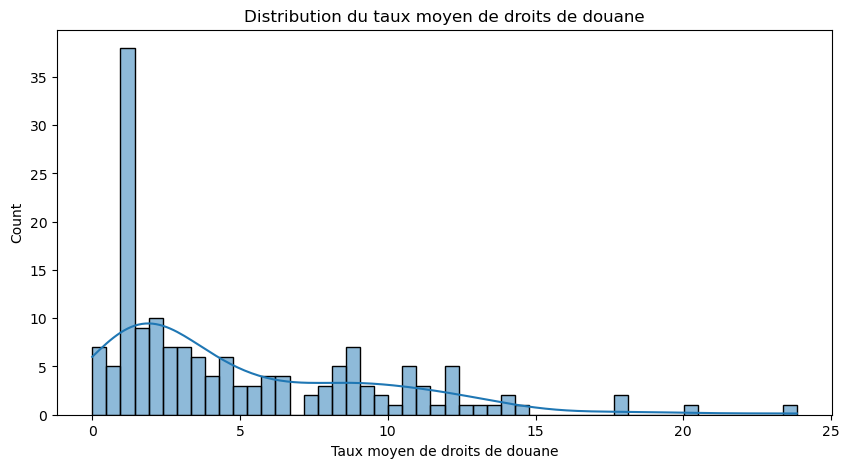

In [69]:
#Représenter la distribution du taux
plt.figure(figsize=(10, 5))
sns.histplot(df_droitsdedouane['taux_droits_douane'], kde=True, bins=50)
plt.title('Distribution du taux moyen de droits de douane')
plt.xlabel('Taux moyen de droits de douane')
plt.show()

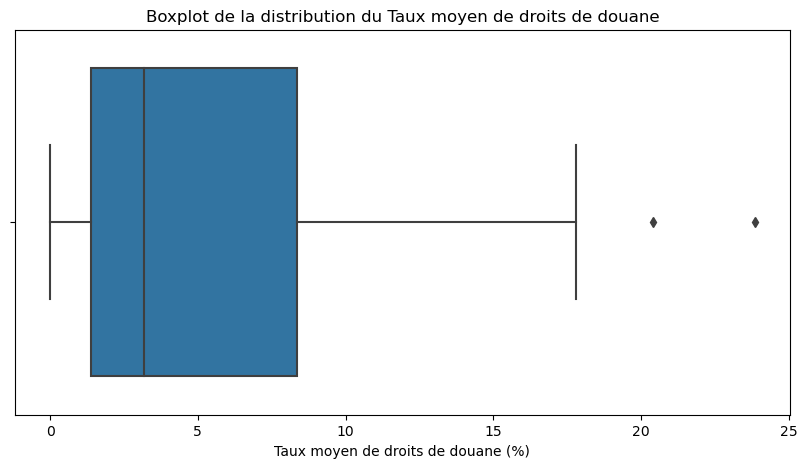

In [70]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_droitsdedouane['taux_droits_douane'])
plt.title('Boxplot de la distribution du Taux moyen de droits de douane')
plt.xlabel('Taux moyen de droits de douane (%)')
plt.show()

In [71]:
#Analyser la normalité de la distribution
droits_douane = df_droitsdedouane['taux_droits_douane']
W, p = st.shapiro(droits_douane)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.8485227823257446, p-value: 1.4369396297841952e-11
La distribution ne suit pas une loi normale.


In [72]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = droits_douane.quantile(0.25)
Q3 = droits_douane.quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour le Taux de droits de douane est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_droitsdedouane[
    (droits_douane < borne_inferieure) |
    (droits_douane > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = droits_douane.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour le Taux de droits de douane est : 6.9799999999999995
Borne inférieure : -9.079999999999998
Borne supérieure : 18.839999999999996
Nombre de valeurs extrêmes : 2
Part des valeurs extrêmes : 1.25%


In [73]:
#Pays avec score de commerce transfontalier en valeurs extrêmes
valeurs_extremes[['Pays', 'taux_droits_douane']]

,Pays,taux_droits_douane
20,Bermudes,23.84
37,Îles Caïmans,20.39


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.7 - Analyse exploratoire du fichier Score Logistique 2018</h3>
<a id="section_2_7"></a>
</div>

In [74]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_score_logistique.shape[0]))
print("Le tableau comporte {} colonnes".format(df_score_logistique.shape[1]))

Le tableau comporte 167 lignes
Le tableau comporte 2 colonnes


In [75]:
#Aperçu du dataset 
df_score_logistique

,Pays,Score_performance_logistique
0,Afghanistan,1.95
1,Angola,2.05
2,Albania,2.66
3,United Arab Emirates,3.96
4,Argentina,2.89
...,...,...
162,Viet Nam,3.27
163,"Yemen, Rep.",2.27
164,South Africa,3.38
165,Zambia,2.53


In [76]:
#Regarder type de données
print(df_score_logistique.dtypes)

Pays                             object
Score_performance_logistique    float64
dtype: object


In [77]:
#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_score_logistique.isnull().sum()
print(nan)

Pays                            0
Score_performance_logistique    0
dtype: int64


In [78]:
#Regarder si il y a les lignes en doublons dans la colonne Pays
doublons = df_score_logistique['Pays'].duplicated()
print(doublons.any())

False


In [79]:
#Observer les mesures sur les données
df_score_logistique.describe()

,Score_performance_logistique
count,167.000000
mean,2.858554
std,0.564455
min,1.950000
25%,2.435000
50%,2.700000
75%,3.210000
max,4.200000


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


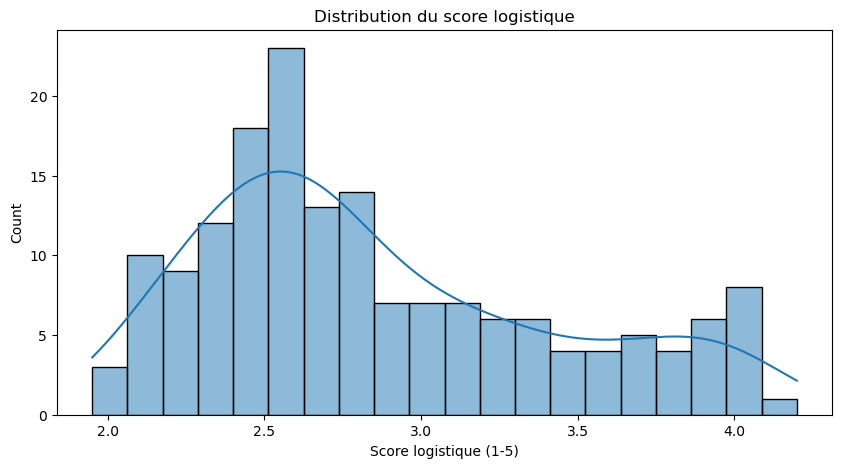

In [80]:
#Représenter la distribution du score
plt.figure(figsize=(10, 5))
sns.histplot(df_score_logistique['Score_performance_logistique'], kde=True, bins=20)
plt.title('Distribution du score logistique')
plt.xlabel('Score logistique (1-5)')
plt.show()

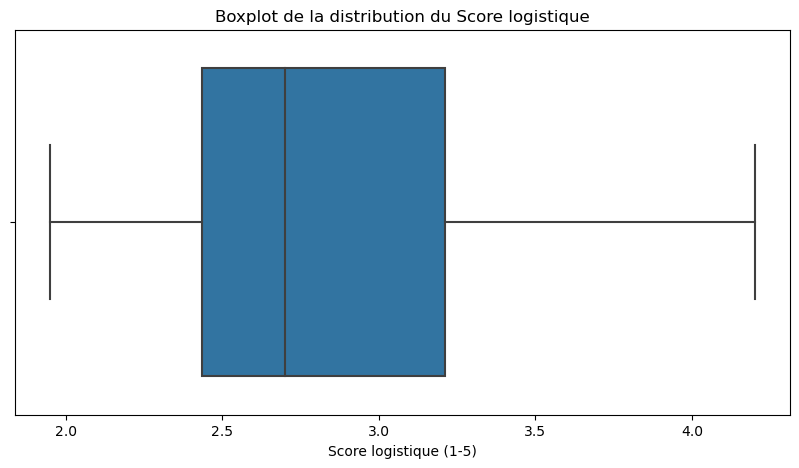

In [81]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_score_logistique['Score_performance_logistique'])
plt.title('Boxplot de la distribution du Score logistique')
plt.xlabel('Score logistique (1-5)')
plt.show()

In [82]:
#Analyser la normalité de la distribution
score_logistique = df_score_logistique['Score_performance_logistique']
W, p = st.shapiro(score_logistique)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.9253057241439819, p-value: 1.374519769115068e-07
La distribution ne suit pas une loi normale.


La boite à moustaches montre qu'il n'y a pas de valeurs extrêmes (> ou < 1.5*IQR)  ni aberrantes.

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.8 - Analyse exploratoire du fichier Population 2023</h3>
<a id="section_2_8"></a>
</div>

In [83]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_population.shape[0]))
print("Le tableau comporte {} colonnes".format(df_population.shape[1]))

Le tableau comporte 217 lignes
Le tableau comporte 2 colonnes


In [84]:
#Aperçu du dataset 
df_population

,Pays,Population (en milliers)
0,Afghanistan,"42239,854"
1,Albania,"2745,972"
2,Algeria,"45606,48"
3,American Samoa,"43,914"
4,Andorra,"80,088"
...,...,...
212,Virgin Islands (U.S.),"104,917"
213,West Bank and Gaza,"5165,775"
214,"Yemen, Rep.","34449,825"
215,Zambia,"20569,737"


In [85]:
#Regarder type de données
print(df_population.dtypes)

Pays                        object
Population (en milliers)    object
dtype: object


In [86]:
# Remplacer les virgules par des points
df_population['Population (en milliers)'] = df_population['Population (en milliers)'].str.replace(',', '.')
print(df_population.dtypes)

Pays                        object
Population (en milliers)    object
dtype: object


In [87]:
# Convertir la colonne en type float
df_population['Population (en milliers)'] = df_population['Population (en milliers)'].astype(float)
print(df_population.dtypes)

Pays                         object
Population (en milliers)    float64
dtype: object


In [88]:
#Transformer la colonne Population (Milliers) en population *1000
df_population['Population'] = df_population['Population (en milliers)'] * 1000
df_population

,Pays,Population (en milliers),Population
0,Afghanistan,42239.854,42239854.0
1,Albania,2745.972,2745972.0
2,Algeria,45606.480,45606480.0
3,American Samoa,43.914,43914.0
4,Andorra,80.088,80088.0
...,...,...,...
212,Virgin Islands (U.S.),104.917,104917.0
213,West Bank and Gaza,5165.775,5165775.0
214,"Yemen, Rep.",34449.825,34449825.0
215,Zambia,20569.737,20569737.0


In [89]:
df_population['Population'] = df_population['Population'].astype(int)
print(df_population.dtypes)

Pays                         object
Population (en milliers)    float64
Population                    int32
dtype: object


In [90]:
#Supprimer l'ancienne colonne
df_population.drop(columns=['Population (en milliers)'], inplace=True)

In [91]:
df_population.head()

,Pays,Population
0,Afghanistan,42239854
1,Albania,2745972
2,Algeria,45606480
3,American Samoa,43914
4,Andorra,80088


In [92]:
#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_population.isnull().sum()
print(nan)

Pays          0
Population    0
dtype: int64


In [93]:
#Regarder si il y a des doublons dans la colonne pays
doublons = df_population['Pays'].duplicated()
print(doublons.any())

False


In [94]:
#Observer les mesures sur les données
df_population.describe()

,Population
count,2.170000e+02
mean,3.687384e+07
std,1.416448e+08
min,1.139600e+04
25%,8.138340e+05
50%,6.516100e+06
75%,2.663854e+07
max,1.428628e+09


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


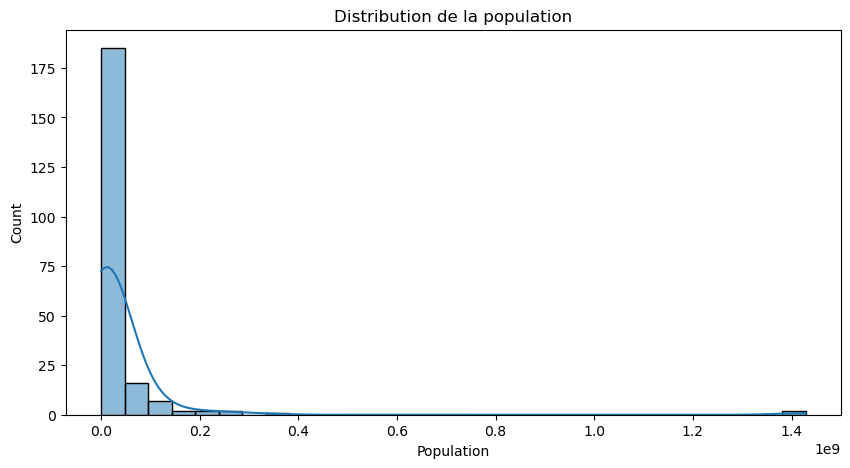

In [95]:
#Représenter la distribution de la population
plt.figure(figsize=(10, 5))
sns.histplot(df_population['Population'], kde=True, bins=30)
plt.title('Distribution de la population')
plt.xlabel('Population')
plt.show()

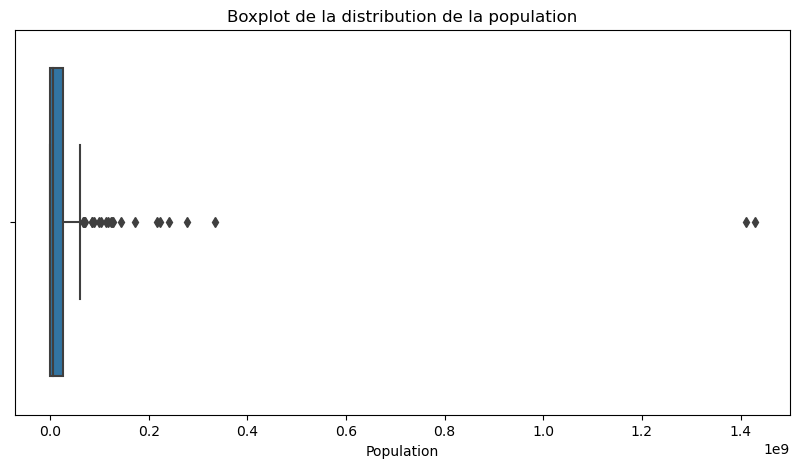

In [96]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_population['Population'])
plt.title('Boxplot de la distribution de la population')
plt.xlabel('Population')
plt.show()

In [97]:
#Analyser la normalité de la distribution
population = df_population['Population']
W, p = st.shapiro(population)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.22297930717468262, p-value: 3.781964881827121e-29
La distribution ne suit pas une loi normale.


In [99]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = population.quantile(0.25)
Q3 = population.quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour les valeurs de population est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_population[
    (population < borne_inferieure) |
    (population > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = population.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour les valeurs de population est : 25824710.0
Borne inférieure : -37923231.0
Borne supérieure : 65375609.0
Nombre de valeurs extrêmes : 23
Part des valeurs extrêmes : 10.60%


In [98]:
#Pays avec Population en valeurs extrêmes
valeurs_extremes[['Pays', 'Population']]

,Pays,Population
15,Bangladesh,172954319
26,Brazil,216422446
41,China,1410710000
44,"Congo, Dem. Rep.",102262808
58,"Egypt, Arab Rep.",112716598
64,Ethiopia,126527060
68,France,68170228
73,Germany,84482267
89,India,1428627663
90,Indonesia,277534122


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.9 - Analyse exploratoire du fichier Croissance de la population 2023</h3>
<a id="section_2_9"></a>
</div>

In [100]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_croissance_pop.shape[0]))
print("Le tableau comporte {} colonnes".format(df_croissance_pop.shape[1]))

Le tableau comporte 223 lignes
Le tableau comporte 2 colonnes


In [101]:
#Aperçu du dataset 
df_croissance_pop

,Pays,Coissance_population (%)
0,Aruba,-0.157953
1,Afghanistan,2.665628
2,Angola,3.030996
3,Albania,-1.148418
4,Andorra,0.330182
...,...,...
218,Kosovo,-0.664615
219,"Yemen, Rep.",2.210656
220,South Africa,0.865465
221,Zambia,2.720528


In [102]:
#Regarder type de données
print(df_croissance_pop.dtypes)

#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_croissance_pop.isnull().sum()

def message_nan(nan):
    total_nan = nan.sum()
    if total_nan == 0:
        print("Il n'y a pas de valeur manquante.")
    elif total_nan == len(nan) * len(df_croissance_pop):
        print("Il y a des valeurs manquantes dans toutes les colonnes.")
    else:
        missing_columns = nan[nan > 0].index.tolist()
        print(f"Il y a des valeurs manquantes dans les colonnes suivantes : {', '.join(missing_columns)}")

# Afficher le message
message_nan(nan)

#Regarder si il y a des doublons dans la colonne pays
doublons = df_croissance_pop['Pays'].duplicated()

def message_doublon (doublons):
    if doublons.any() ==False:
        print("Il n'y a pas de doublon.")
    else :
        print("Il y a des doublons dans la colonne.")
message_doublon(doublons)

Pays                         object
Coissance_population (%)    float64
dtype: object
Il n'y a pas de valeur manquante.
Il n'y a pas de doublon.


In [103]:
#Renommer la colonne avec une faute
df_croissance_pop['Croissance_pop (%)']= df_croissance_pop['Coissance_population (%)']
#Supprimer l'ancienne colonne
df_croissance_pop.drop(columns=['Coissance_population (%)'], inplace=True)

In [104]:
#Observer les mesures de tendance centrale et de dispersion
df_croissance_pop.describe()

,Croissance_pop (%)
count,223.000000
mean,1.073205
std,1.171423
min,-2.666825
25%,0.354699
50%,0.923258
75%,1.905088
max,4.859655


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


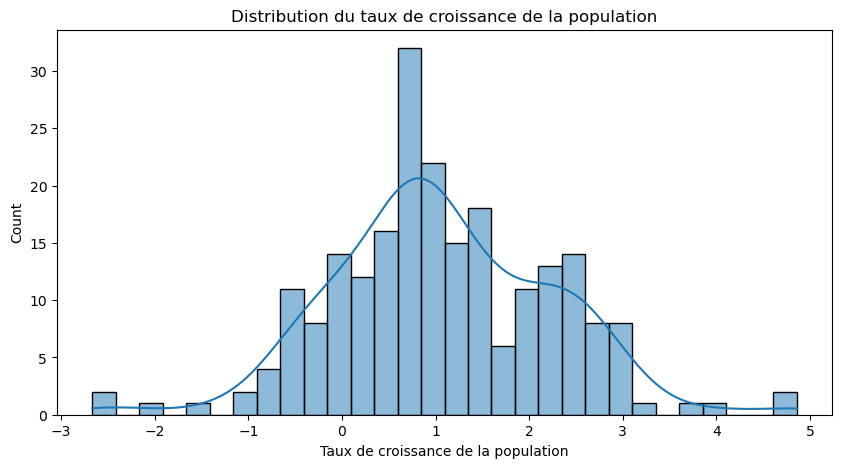

In [105]:
#Représenter la distribution de la population
plt.figure(figsize=(10, 5))
sns.histplot(df_croissance_pop['Croissance_pop (%)'], kde=True, bins=30)
plt.title('Distribution du taux de croissance de la population')
plt.xlabel('Taux de croissance de la population')
plt.show()

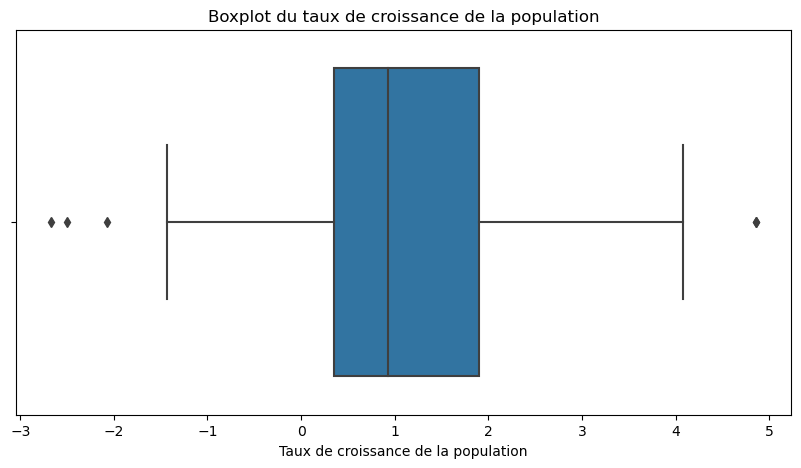

In [106]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_croissance_pop['Croissance_pop (%)'])
plt.title('Boxplot du taux de croissance de la population')
plt.xlabel('Taux de croissance de la population')
plt.show()

In [107]:
#Analyser la normalité de la distribution
pop_croissance = df_croissance_pop['Croissance_pop (%)']
W, p = st.shapiro(pop_croissance)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.9856814742088318, p-value: 0.02409263141453266
La distribution ne suit pas une loi normale.


In [108]:
#Considérer la distribution : calcul du skewness (asymétrie) et du kurtosis (aplatissement)
skewness = st.skew(pop_croissance)
kurtosis = st.kurtosis(pop_croissance,fisher=False) 
excess_kurtosis = st.kurtosis(pop_croissance)

print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Excès de kurtosis: {excess_kurtosis}")

Skewness: 0.11407606645112135
Kurtosis réel: 3.680987516909535
Excès de kurtosis: 0.6809875169095352


- Légère asymétrie positive, la queue droite de la distribution est légèrement plus longue et plus épaisse que la queue gauche. 
- Kurtosis indique que le pic est légèrement plus aplati plus que la distribution normale et des queues plus lourdes.

In [109]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_croissance_pop['Croissance_pop (%)'].quantile(0.25)
Q3 = df_croissance_pop['Croissance_pop (%)'].quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour le taux de croissance de la population est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_croissance_pop[
    (df_croissance_pop['Croissance_pop (%)'] < borne_inferieure) |
    (df_croissance_pop['Croissance_pop (%)'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_croissance_pop.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour le taux de croissance de la population est : 1.550388622972748
Borne inférieure : -1.970884050652105
Borne supérieure : 4.230670441238887
Nombre de valeurs extrêmes : 5
Part des valeurs extrêmes : 2.24%


In [110]:
#Pays avec taux de croissance de population en valeurs extrêmes
valeurs_extremes[['Pays', 'Croissance_pop (%)']]

,Pays,Croissance_pop (%)
112,Lebanon,-2.504984
126,Moldova,-2.069522
176,Singapore,4.858316
192,Syrian Arab Republic,4.859655
207,Ukraine,-2.666825


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.10 - Analyse exploratoire de la part de la population urbaine 2023</h3>
<a id="section_2_10"></a>
</div>

In [111]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_pop_urbaine.shape[0]))
print("Le tableau comporte {} colonnes".format(df_pop_urbaine.shape[1]))

Le tableau comporte 211 lignes
Le tableau comporte 2 colonnes


In [112]:
#Aperçu du dataset 
df_pop_urbaine

,Pays,part_pop_urbaine%
0,Aruba,44.254
1,Afghanistan,26.933
2,Angola,68.688
3,Albania,64.603
4,Andorra,87.774
...,...,...
206,Samoa,17.508
207,"Yemen, Rep.",39.831
208,South Africa,68.819
209,Zambia,46.335


In [113]:
#Regarder type de données
print(df_pop_urbaine.dtypes)

#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_pop_urbaine.isnull().sum()

def message_nan(nan):
    total_nan = nan.sum()
    if total_nan == 0:
        print("Il n'y a pas de valeur manquante.")
    elif total_nan == len(nan) * len(df_pop_urbaine):
        print("Il y a des valeurs manquantes dans toutes les colonnes.")
    else:
        missing_columns = nan[nan > 0].index.tolist()
        print(f"Il y a des valeurs manquantes dans les colonnes suivantes : {', '.join(missing_columns)}")

# Afficher le message
message_nan(nan)

#Regarder si il y a des doublons dans la colonne pays
doublons = df_pop_urbaine['Pays'].duplicated()

def message_doublon (doublons):
    if doublons.any() ==False:
        print("Il n'y a pas de doublon.")
    else :
        print("Il y a des doublons dans la colonne.")
message_doublon(doublons)

Pays                  object
part_pop_urbaine%    float64
dtype: object
Il n'y a pas de valeur manquante.
Il n'y a pas de doublon.


In [114]:
#Observer les mesures de tendance centrale et de dispersion
df_pop_urbaine.describe()

,part_pop_urbaine%
count,211.000000
mean,62.023408
std,23.335729
min,13.723000
25%,43.934000
50%,63.739000
75%,81.594000
max,100.000000


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


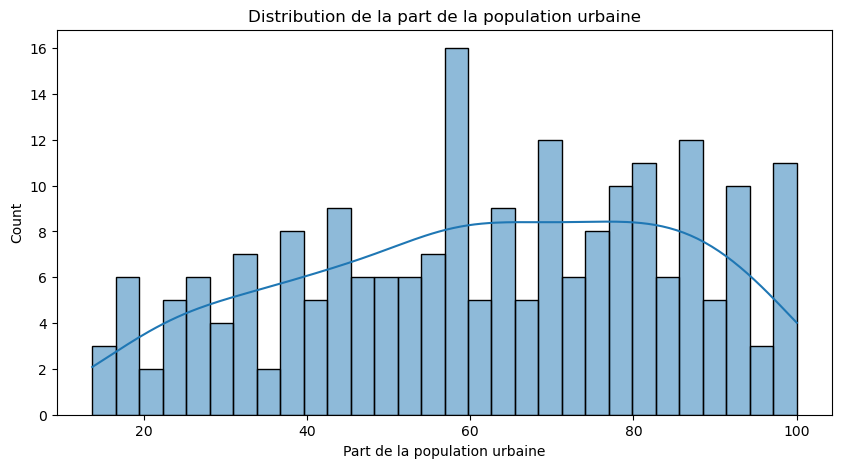

In [115]:
#Représenter la distribution de la population urbaine
plt.figure(figsize=(10, 5))
sns.histplot(df_pop_urbaine['part_pop_urbaine%'], kde=True, bins=30)
plt.title('Distribution de la part de la population urbaine')
plt.xlabel('Part de la population urbaine')
plt.show()

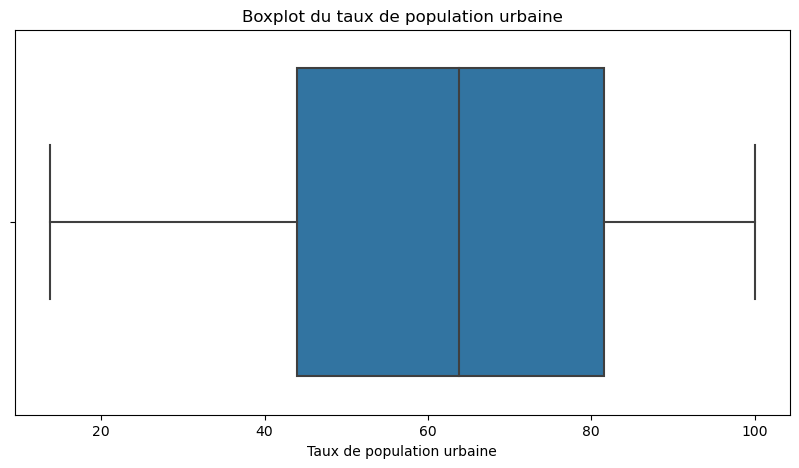

In [116]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pop_urbaine['part_pop_urbaine%'])
plt.title('Boxplot du taux de population urbaine')
plt.xlabel('Taux de population urbaine')
plt.show()

In [117]:
#Analyser la normalité de la distribution
pop_urbaine = df_pop_urbaine['part_pop_urbaine%']
W, p = st.shapiro(pop_urbaine)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.9655431509017944, p-value: 5.123186929267831e-05
La distribution ne suit pas une loi normale.


In [118]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = pop_urbaine.quantile(0.25)
Q3 = pop_urbaine.quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour le taux de population urbaine est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_pop_urbaine[
    (pop_urbaine < borne_inferieure) |
    (pop_urbaine > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_pop_urbaine.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour le taux de population urbaine est : 37.66
Borne inférieure : -12.555999999999997
Borne supérieure : 138.084
Nombre de valeurs extrêmes : 0
Part des valeurs extrêmes : 0.00%


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.11 - Analyse exploratoire de l'évolution de la population urbaine 2023</h3>
<a id="section_2_11"></a>
</div>

In [119]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_evol_pop_urbaine.shape[0]))
print("Le tableau comporte {} colonnes".format(df_evol_pop_urbaine.shape[1]))

Le tableau comporte 219 lignes
Le tableau comporte 2 colonnes


In [120]:
#Aperçu du dataset 
df_evol_pop_urbaine

,Pays,population_urbaine_croissance (%)
0,Aruba,0.300246
1,Afghanistan,3.849603
2,Angola,3.918632
3,Albania,0.103888
4,Andorra,0.287770
...,...,...
214,Samoa,0.856563
215,"Yemen, Rep.",3.838151
216,South Africa,1.571244
217,Zambia,3.967077


In [121]:
#Regarder type de données
print(df_evol_pop_urbaine.dtypes)

#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_evol_pop_urbaine.isnull().sum()

def message_nan(nan):
    total_nan = nan.sum()
    if total_nan == 0:
        print("Il n'y a pas de valeur manquante.")
    elif total_nan == len(nan) * len(df_evol_pop_urbaine):
        print("Il y a des valeurs manquantes dans toutes les colonnes.")
    else:
        missing_columns = nan[nan > 0].index.tolist()
        print(f"Il y a des valeurs manquantes dans les colonnes suivantes : {', '.join(missing_columns)}")

# Afficher le message
message_nan(nan)

#Regarder si il y a des doublons dans la colonne pays
doublons = df_evol_pop_urbaine['Pays'].duplicated()

def message_doublon (doublons):
    if doublons.any() ==False:
        print("Il n'y a pas de doublon.")
    else :
        print("Il y a des doublons dans la colonne.")
message_doublon(doublons)

Pays                                  object
population_urbaine_croissance (%)    float64
dtype: object
Il n'y a pas de valeur manquante.
Il n'y a pas de doublon.


In [122]:
#Observer les mesures de tendance centrale et de dispersion
df_evol_pop_urbaine.describe()

,population_urbaine_croissance (%)
count,219.000000
mean,1.736534
std,1.469082
min,-2.415421
25%,0.749746
50%,1.566302
75%,2.785454
max,5.980717


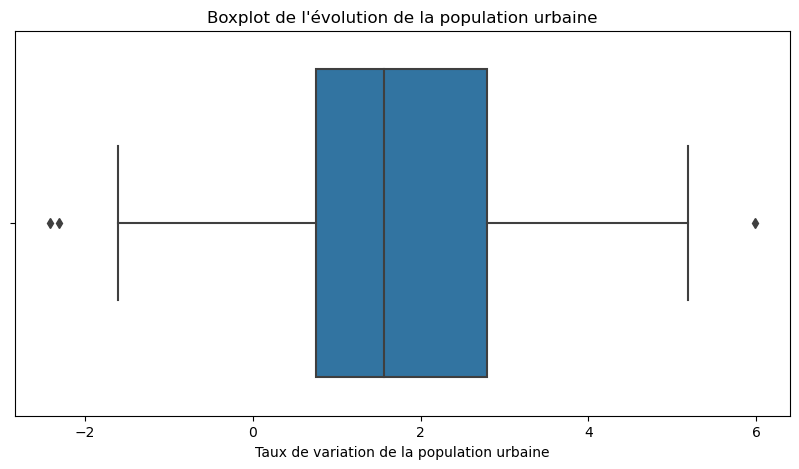

In [123]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_evol_pop_urbaine['population_urbaine_croissance (%)'])
plt.title('Boxplot de l\'évolution de la population urbaine')
plt.xlabel('Taux de variation de la population urbaine')
plt.show()

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


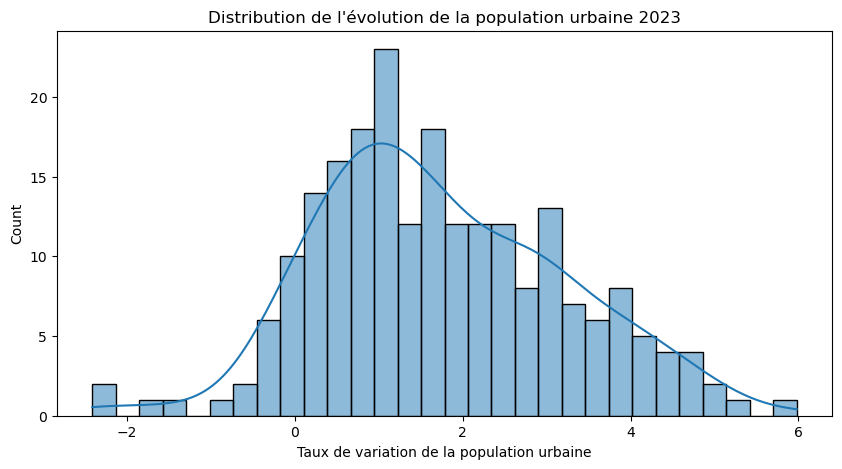

In [124]:
#Représenter la distribution dde l'évolution de la population urbaine
plt.figure(figsize=(10, 5))
sns.histplot(df_evol_pop_urbaine['population_urbaine_croissance (%)'], kde=True, bins=30)
plt.title('Distribution de l\'évolution de la population urbaine 2023')
plt.xlabel('Taux de variation de la population urbaine')
plt.show()

In [125]:
#Analyser la normalité de la distribution
evol_pop_urbaine = df_evol_pop_urbaine['population_urbaine_croissance (%)']
W, p = st.shapiro(evol_pop_urbaine)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.983448326587677, p-value: 0.011533183977007866
La distribution ne suit pas une loi normale.


In [126]:
#Considérer la distribution : calcul du skewness (asymétrie) et du kurtosis (aplatissement)
skewness = st.skew(evol_pop_urbaine)
kurtosis = st.kurtosis(evol_pop_urbaine,fisher=False) 
excess_kurtosis = st.kurtosis(evol_pop_urbaine)

print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Excès de kurtosis: {excess_kurtosis}")

Skewness: 0.26101287370959764
Kurtosis réel: 2.9062646626966737
Excès de kurtosis: -0.09373533730332628


- Très légère asymétrie vers la droite (davantage de données > à la moyenne). 
- Un peu plus aplatie (données plus étalées) que la distribution suivant une loi normale. Mais proche d'une distribution normale.

In [127]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = evol_pop_urbaine.quantile(0.25)
Q3 = evol_pop_urbaine.quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour l'évolution de la population urbaine est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_evol_pop_urbaine[
    (evol_pop_urbaine < borne_inferieure) |
    (evol_pop_urbaine > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_evol_pop_urbaine.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour l'évolution de la population urbaine est : 2.03570873622377
Borne inférieure : -2.303817496179365
Borne supérieure : 5.839017448715715
Nombre de valeurs extrêmes : 3
Part des valeurs extrêmes : 1.37%


In [128]:
#Pays avec taux de croissance de population en valeurs extrêmes
valeurs_extremes[['Pays', 'population_urbaine_croissance (%)']]

,Pays,population_urbaine_croissance (%)
107,Lebanon,-2.314712
189,Syrian Arab Republic,5.980717
204,Ukraine,-2.415421


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.12 - Analyse exploratoire de l'espérance de vie à la naissance 2022</h3>
<a id="section_2_12"></a>
</div>

In [129]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_esperancedevie.shape[0]))
print("Le tableau comporte {} colonnes".format(df_esperancedevie.shape[1]))

Le tableau comporte 209 lignes
Le tableau comporte 2 colonnes


In [130]:
#Aperçu du dataset 
df_esperancedevie

,Pays,Esperance_vie_naissance (années)
0,Afghanistan,62.879000
1,Albania,76.833000
2,Algeria,77.129000
3,Angola,61.929000
4,Antigua and Barbuda,79.236000
...,...,...
204,Virgin Islands (U.S.),80.319512
205,West Bank and Gaza,73.444000
206,"Yemen, Rep.",63.720000
207,Zambia,61.803000


In [131]:
#Regarder type de données
print(df_esperancedevie.dtypes)

#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_esperancedevie.isnull().sum()

def message_nan(nan):
    total_nan = nan.sum()
    if total_nan == 0:
        print("Il n'y a pas de valeur manquante.")
    elif total_nan == len(nan) * len(df_esperancedevie):
        print("Il y a des valeurs manquantes dans toutes les colonnes.")
    else:
        missing_columns = nan[nan > 0].index.tolist()
        print(f"Il y a des valeurs manquantes dans les colonnes suivantes : {', '.join(missing_columns)}")

# Afficher le message
message_nan(nan)

#Regarder si il y a des doublons dans la colonne pays
doublons = df_esperancedevie['Pays'].duplicated()

def message_doublon (doublons):
    if doublons.any() ==False:
        print("Il n'y a pas de doublon.")
    else :
        print("Il y a des doublons dans la colonne.")
message_doublon(doublons)

Pays                                 object
Esperance_vie_naissance (années)    float64
dtype: object
Il n'y a pas de valeur manquante.
Il n'y a pas de doublon.


In [132]:
#Regarder les mesures de tendance centrale et de dispersion
df_esperancedevie.describe()

,Esperance_vie_naissance (années)
count,209.000000
mean,72.416519
std,7.713322
min,52.997000
25%,66.782000
50%,73.514634
75%,78.475000
max,85.377000


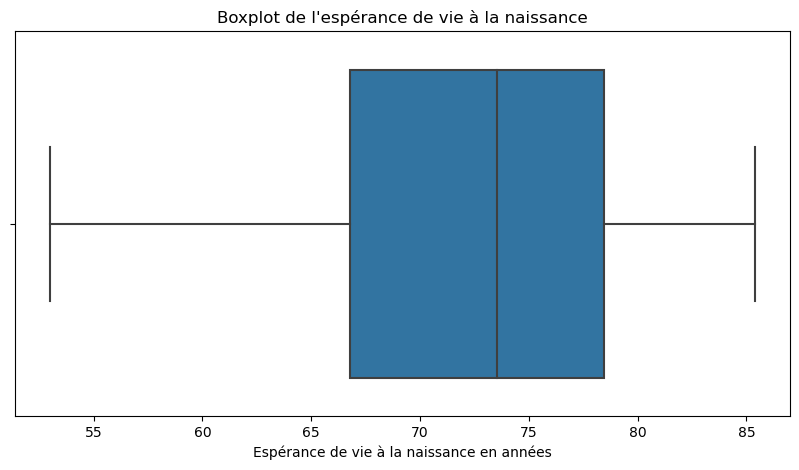

In [133]:
#Représenter la distribution de l'espérance de vie à la naissance
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_esperancedevie['Esperance_vie_naissance (années)'])
plt.title('Boxplot de l\'espérance de vie à la naissance')
plt.xlabel('Espérance de vie à la naissance en années')
plt.show()

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


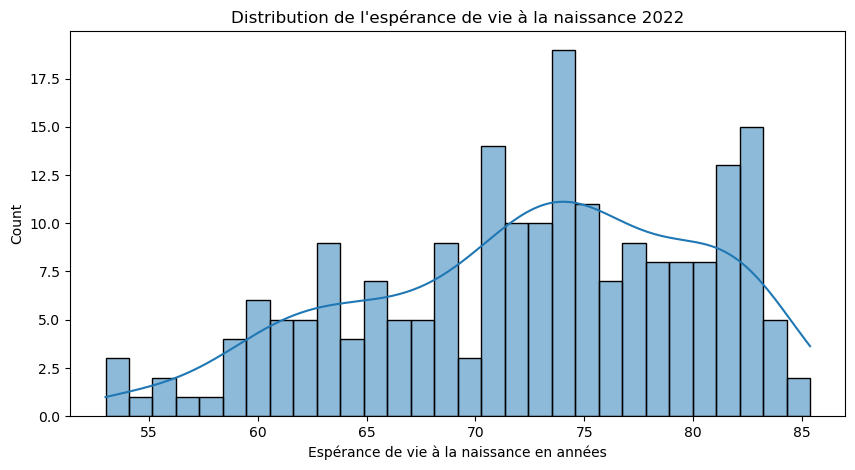

In [134]:
#Représenter la distribution de l'espérance de vie à la naissance
plt.figure(figsize=(10, 5))
sns.histplot(df_esperancedevie['Esperance_vie_naissance (années)'], kde=True, bins=30)
plt.title('Distribution de l\'espérance de vie à la naissance 2022')
plt.xlabel('Espérance de vie à la naissance en années')
plt.show()

In [135]:
#Analyser la normalité de la distribution
esperance_vie = df_esperancedevie['Esperance_vie_naissance (années)']
W, p = st.shapiro(esperance_vie)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.9617658257484436, p-value: 2.034477256529499e-05
La distribution ne suit pas une loi normale.


In [136]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = esperance_vie.quantile(0.25)
Q3 = esperance_vie.quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour l'espérance de vie est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_esperancedevie[
    (esperance_vie < borne_inferieure) |
    (esperance_vie > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_esperancedevie.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour l'espérance de vie est : 11.692999999999998
Borne inférieure : 49.2425
Borne supérieure : 96.0145
Nombre de valeurs extrêmes : 0
Part des valeurs extrêmes : 0.00%


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.13 - Analyse exploratoire de la disponibilité de la viande de volailles en 2022</h3>
<a id="section_2_13"></a>
</div>

In [137]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_dispo_volailles.shape[0]))
print("Le tableau comporte {} colonnes".format(df_dispo_volailles.shape[1]))

Le tableau comporte 1450 lignes
Le tableau comporte 6 colonnes


In [138]:
#Aperçu du dataset
df_dispo_volailles

,Pays,Élément,Année,Unité,Valeur viande de volailles,Elément_unité
0,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),2022,kcal/personne/jour,3.29,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2022,kcal/personne,0.87,Disponibilité alimentaire en quantité (kg/pers...
2,Afghanistan,Disponibilité intérieure,2022,1000 t,36.00,Disponibilité intérieure - 1000 t
3,Afghanistan,Importations - quantité,2022,1000 t,7.00,Importations - quantité - 1000 t
4,Afghanistan,Nourriture,2022,1000 t,36.00,Nourriture - 1000 t
...,...,...,...,...,...,...
1445,Zimbabwe,Disponibilité intérieure,2022,1000 t,117.00,Disponibilité intérieure - 1000 t
1446,Zimbabwe,Importations - quantité,2022,1000 t,5.00,Importations - quantité - 1000 t
1447,Zimbabwe,Nourriture,2022,1000 t,117.00,Nourriture - 1000 t
1448,Zimbabwe,Production,2022,1000 t,112.00,Production - 1000 t


In [139]:
# Enlever la colonne année
df_dispo_volailles = df_dispo_volailles.drop(columns=['Année'])
df_dispo_volailles

,Pays,Élément,Unité,Valeur viande de volailles,Elément_unité
0,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),kcal/personne/jour,3.29,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,kcal/personne,0.87,Disponibilité alimentaire en quantité (kg/pers...
2,Afghanistan,Disponibilité intérieure,1000 t,36.00,Disponibilité intérieure - 1000 t
3,Afghanistan,Importations - quantité,1000 t,7.00,Importations - quantité - 1000 t
4,Afghanistan,Nourriture,1000 t,36.00,Nourriture - 1000 t
...,...,...,...,...,...
1445,Zimbabwe,Disponibilité intérieure,1000 t,117.00,Disponibilité intérieure - 1000 t
1446,Zimbabwe,Importations - quantité,1000 t,5.00,Importations - quantité - 1000 t
1447,Zimbabwe,Nourriture,1000 t,117.00,Nourriture - 1000 t
1448,Zimbabwe,Production,1000 t,112.00,Production - 1000 t


In [140]:
# Créer une colonne par Elément_unité
df_volailles = df_dispo_volailles.pivot(index=['Pays'], columns='Elément_unité', values='Valeur viande de volailles').reset_index()

In [141]:
# Supprimer d'ores et déjà les colonnes 'Variation de stock - 1000 ts' et 'Disponibilité intérieure - 1000 t'
df_volailles = df_volailles.drop(columns=['Variation de stock - 1000 t', 'Disponibilité intérieure - 1000 t'])

# vérifier
df_volailles

Elément_unité,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité - 1000 t,Importations - quantité - 1000 t,Nourriture - 1000 t,Production - 1000 t
0,Afghanistan,3.29,0.87,NaN,7.0,36.0,29.0
1,Afrique du Sud,149.24,39.57,50.0,304.0,2370.0,1958.0
2,Albanie,85.67,22.56,NaN,47.0,64.0,18.0
3,Algérie,23.14,6.13,0.0,0.0,275.0,275.0
4,Allemagne,60.85,16.51,664.0,789.0,1376.0,1507.0
...,...,...,...,...,...,...,...
183,Équateur,108.60,28.78,0.0,1.0,518.0,517.0
184,États-Unis d'Amérique,198.23,53.54,3994.0,191.0,18111.0,22030.0
185,Éthiopie,1.49,0.40,NaN,0.0,49.0,49.0
186,Îles Marshall,280.32,74.75,0.0,3.0,3.0,NaN


In [142]:
#Regarder type de données
print(df_volailles.dtypes)

#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_volailles.isnull().sum()

def message_nan(nan):
    total_nan = nan.sum()
    if total_nan == 0:
        print("Il n'y a pas de valeur manquante.")
    elif total_nan == len(nan) * len(df_volailles):
        print("Il y a des valeurs manquantes dans toutes les colonnes.")
    else:
        missing_columns = nan[nan > 0].index.tolist()
        print(f"Il y a des valeurs manquantes dans les colonnes suivantes : {', '.join(missing_columns)}")

# Afficher le message
message_nan(nan)

#Regarder si il y a des doublons dans la colonne pays
doublons = df_volailles['Pays'].duplicated()

def message_doublon (doublons):
    if doublons.any() ==False:
        print("Il n'y a pas de doublon.")
    else :
        print("Il y a des doublons dans la colonne.")
message_doublon(doublons)

Elément_unité
Pays                                                       object
Disponibilité alimentaire (Kcal/personne/jour)            float64
Disponibilité alimentaire en quantité (kg/personne/an)    float64
Exportations - quantité - 1000 t                          float64
Importations - quantité - 1000 t                          float64
Nourriture - 1000 t                                       float64
Production - 1000 t                                       float64
dtype: object
Il y a des valeurs manquantes dans les colonnes suivantes : Exportations - quantité - 1000 t, Production - 1000 t
Il n'y a pas de doublon.


In [143]:
df_volailles.isnull().sum()

Elément_unité
Pays                                                       0
Disponibilité alimentaire (Kcal/personne/jour)             0
Disponibilité alimentaire en quantité (kg/personne/an)     0
Exportations - quantité - 1000 t                          51
Importations - quantité - 1000 t                           0
Nourriture - 1000 t                                        0
Production - 1000 t                                        3
dtype: int64

Plus de 27% de données manquantes dans la colonne exportations. Il semble compliquer d'utiliser cette colonne. D'autant plus qu'il reste à réaliser la jointure entre les pays qui va entrainer une baisse du nombre de pays dans le dataset.

In [144]:
#Regarder combien il y a de valeurs à 0 dans la colonne exportations
valeurs_zero = (df_volailles['Exportations - quantité - 1000 t'] == 0).sum()
print(f"Nombre de valeurs égales à 0 dans la colonne 'Exportations - quantité - 1000 t' : {valeurs_zero}")

Nombre de valeurs égales à 0 dans la colonne 'Exportations - quantité - 1000 t' : 49


In [145]:
#Considérer les mesures de tendance centrale et de dispersion
df_volailles.describe()

Elément_unité,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité - 1000 t,Importations - quantité - 1000 t,Nourriture - 1000 t,Production - 1000 t
count,188.000000,188.000000,137.000000,188.000000,188.000000,185.000000
mean,92.596649,24.233138,140.715328,94.542553,719.648936,751.702703
std,72.908642,19.167540,554.573988,205.937360,2435.198408,2674.088872
min,1.490000,0.400000,0.000000,0.000000,0.000000,0.000000
25%,30.885000,8.177500,0.000000,4.000000,30.250000,10.000000
50%,81.540000,21.385000,2.000000,20.000000,113.500000,75.000000
75%,138.672500,35.767500,37.000000,87.000000,342.250000,365.000000
max,351.710000,94.060000,4554.000000,1316.000000,24436.000000,23400.000000


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

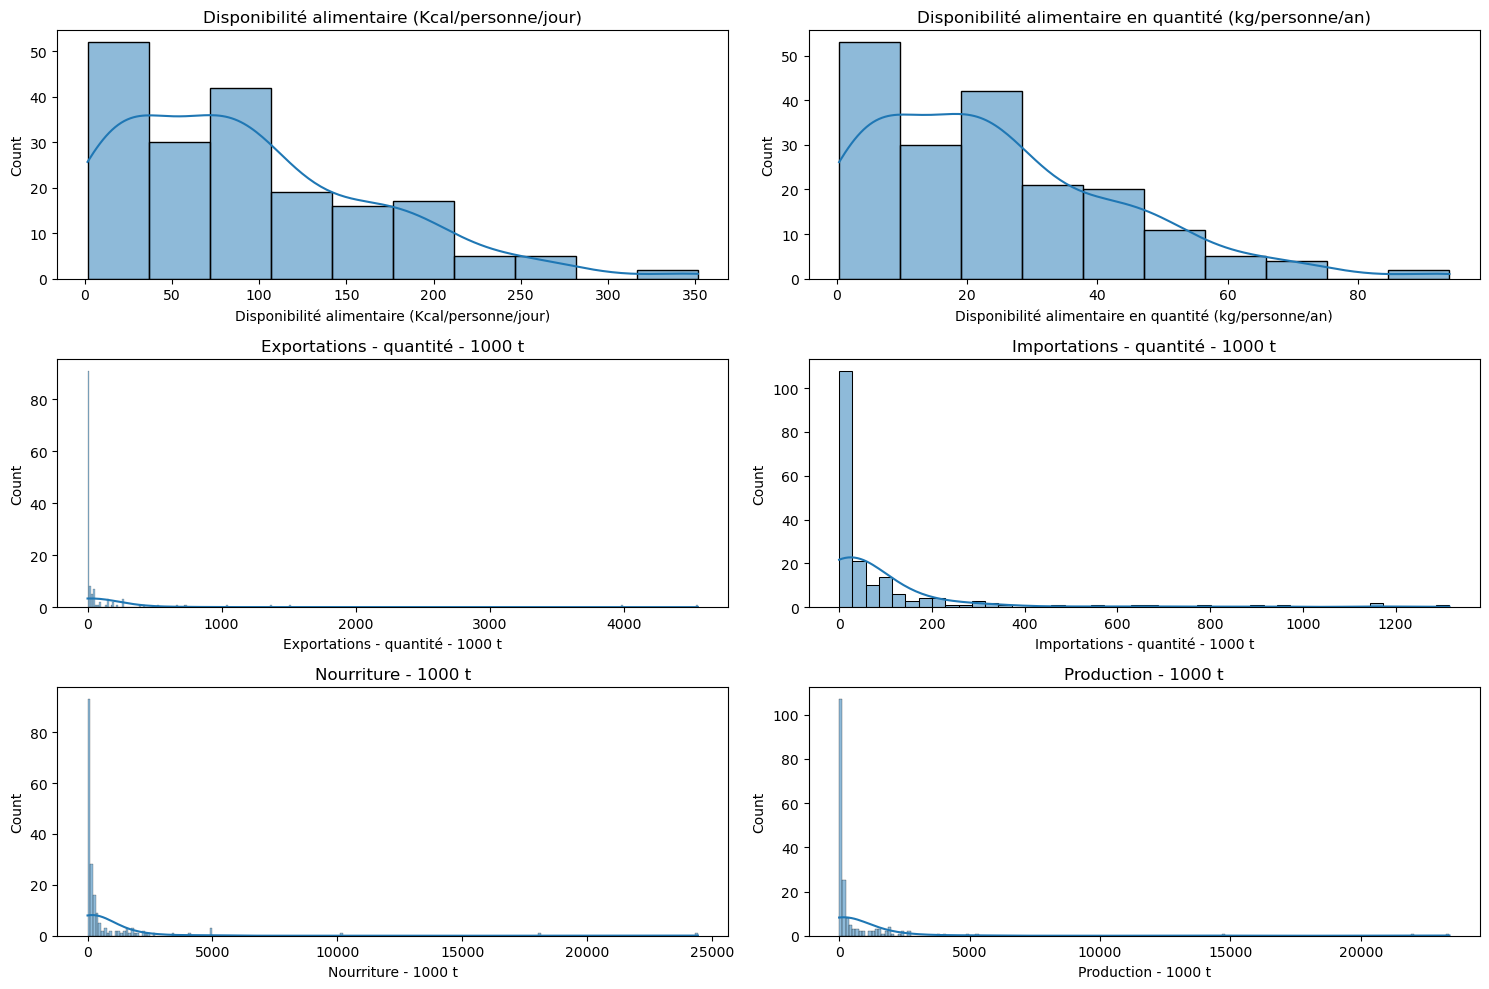

In [146]:
#Représenter les distributions
colonnes = [
    'Disponibilité alimentaire (Kcal/personne/jour)',
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Exportations - quantité - 1000 t',
    'Importations - quantité - 1000 t',
    'Nourriture - 1000 t',
    'Production - 1000 t'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
# Itérer sur les colonnes et les axes pour créer les histogrammes avec courbe de densité
for col, ax in zip(colonnes, axes.flatten()):
    sns.histplot(df_volailles[col], kde=True, ax=ax)
    ax.set_title(col)
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

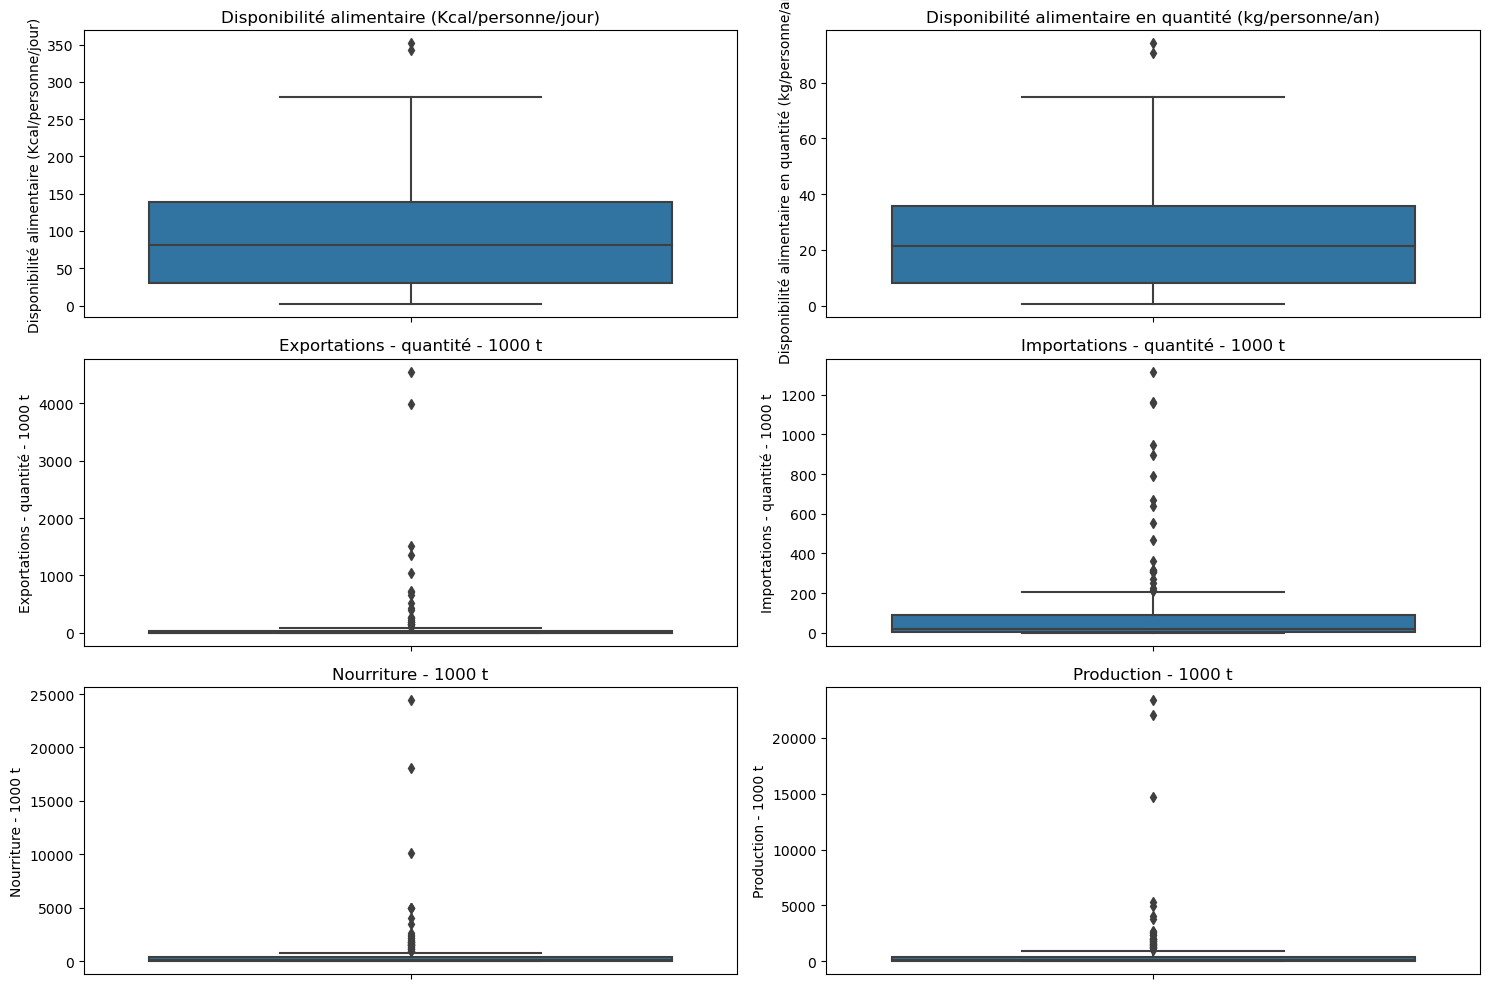

In [147]:
#Regarder les distributions en boxplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
# Itérer sur les colonnes et les axes pour créer les box plots
for col, ax in zip(colonnes, axes.flatten()):
    sns.boxplot(y=df_volailles[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [148]:
# Fonction pour calculer l'IQR et les valeurs extrêmes
def analyser_valeurs_extremes(colonne,df):
    Q1 = colonne.quantile(0.25)
    Q3 = colonne.quantile(0.75)
    IQR = Q3 - Q1
    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR
    valeurs_extremes = colonne[(colonne < borne_inferieure) | (colonne > borne_superieure)]
    nombre_valeurs_extremes = valeurs_extremes.shape[0]
    nombre_total_valeurs = colonne.shape[0]
    part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100

    print(f"Colonne : {colonne.name}")
    print(f"IQR : {IQR}")
    print(f"Borne inférieure : {borne_inferieure}")
    print(f"Borne supérieure : {borne_superieure}")
    print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
    print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")
    print("\n")

# Appliquer la fonction à chaque colonne grâce à une boucle
for col in colonnes:
    analyser_valeurs_extremes(df_volailles[col], df_volailles)

Colonne : Disponibilité alimentaire (Kcal/personne/jour)
IQR : 107.78750000000002
Borne inférieure : -130.79625000000004
Borne supérieure : 300.35375000000005
Nombre de valeurs extrêmes : 2
Part des valeurs extrêmes : 1.06%


Colonne : Disponibilité alimentaire en quantité (kg/personne/an)
IQR : 27.589999999999996
Borne inférieure : -33.20749999999999
Borne supérieure : 77.15249999999999
Nombre de valeurs extrêmes : 2
Part des valeurs extrêmes : 1.06%


Colonne : Exportations - quantité - 1000 t
IQR : 37.0
Borne inférieure : -55.5
Borne supérieure : 92.5
Nombre de valeurs extrêmes : 24
Part des valeurs extrêmes : 12.77%


Colonne : Importations - quantité - 1000 t
IQR : 83.0
Borne inférieure : -120.5
Borne supérieure : 211.5
Nombre de valeurs extrêmes : 21
Part des valeurs extrêmes : 11.17%


Colonne : Nourriture - 1000 t
IQR : 312.0
Borne inférieure : -437.75
Borne supérieure : 810.25
Nombre de valeurs extrêmes : 31
Part des valeurs extrêmes : 16.49%


Colonne : Production - 1000 t
IQ

A garder en tête la forte proportions de valeurs extrêmes dans les colonnes exportations; importations; production et nourriture. Cependant, ces valeurs ne semblent pas aberrantes mais réalistes.

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.14 - Analyse exploratoire du non-accès à l'alimentation saine en 2022</h3>
<a id="section_2_14"></a>
</div>

In [149]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_healthyfood.shape[0]))
print("Le tableau comporte {} colonnes".format(df_healthyfood.shape[1]))

Le tableau comporte 146 lignes
Le tableau comporte 2 colonnes


In [150]:
#Aperçu du dataset
df_healthyfood

,Pays,Absence_acces_alimentation_saine (%pop)
0,Albania,12.2
1,Algeria,19.7
2,Angola,72.2
3,Armenia,54.9
4,Australia,3.2
...,...,...
141,Uruguay,36.1
142,Uzbekistan,15.0
143,Viet Nam,9.4
144,West Bank and Gaza,4.4


In [151]:
#Regarder type de données
print(df_healthyfood.dtypes)

#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_healthyfood.isnull().sum()

def message_nan(nan):
    total_nan = nan.sum()
    if total_nan == 0:
        print("Il n'y a pas de valeur manquante.")
    elif total_nan == len(nan) * len(df_healthyfood):
        print("Il y a des valeurs manquantes dans toutes les colonnes.")
    else:
        missing_columns = nan[nan > 0].index.tolist()
        print(f"Il y a des valeurs manquantes dans les colonnes suivantes : {', '.join(missing_columns)}")

# Afficher le message
message_nan(nan)

#Regarder si il y a des doublons dans la colonne pays
doublons = df_healthyfood['Pays'].duplicated()

def message_doublon (doublons):
    if doublons.any() ==False:
        print("Il n'y a pas de doublon.")
    else :
        print("Il y a des doublons dans la colonne.")
message_doublon(doublons)

Pays                                        object
Absence_acces_alimentation_saine (%pop)    float64
dtype: object
Il n'y a pas de valeur manquante.
Il n'y a pas de doublon.


In [152]:
#Observer la description des mesures
df_healthyfood.describe()

,Absence_acces_alimentation_saine (%pop)
count,146.000000
mean,32.012329
std,27.409002
min,0.400000
25%,7.000000
50%,24.450000
75%,55.500000
max,93.600000


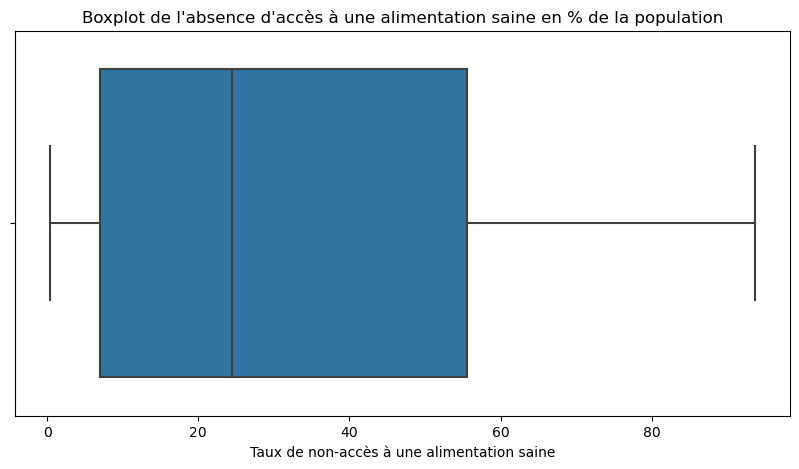

In [153]:
#Représenter la distribution de l'absence d'accès à une alimentation saine
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_healthyfood['Absence_acces_alimentation_saine (%pop)'])
plt.title('Boxplot de l\'absence d\'accès à une alimentation saine en % de la population')
plt.xlabel('Taux de non-accès à une alimentation saine')
plt.show()

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


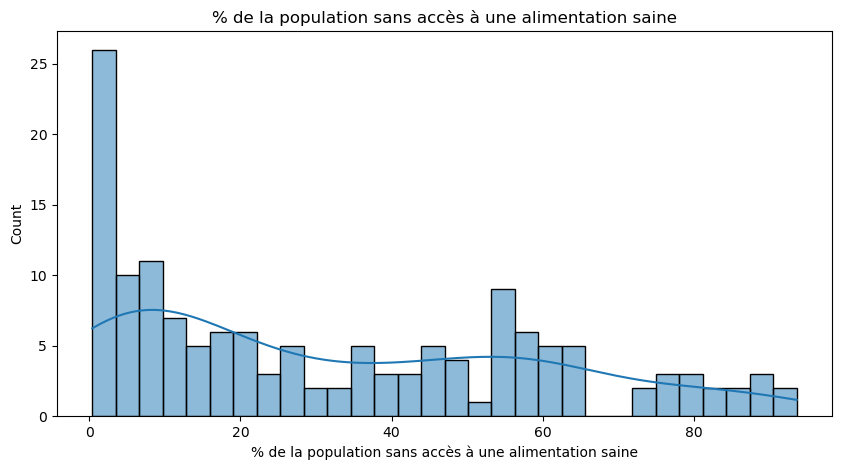

In [154]:
#Représenter la distribution de l'espérance de vie à la naissance
plt.figure(figsize=(10, 5))
sns.histplot(df_healthyfood['Absence_acces_alimentation_saine (%pop)'], kde=True, bins=30)
plt.title('% de la population sans accès à une alimentation saine')
plt.xlabel('% de la population sans accès à une alimentation saine')
plt.show()

In [155]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_healthyfood['Absence_acces_alimentation_saine (%pop)'].quantile(0.25)
Q3 = df_healthyfood['Absence_acces_alimentation_saine (%pop)'].quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour l'absence d'accès à une alimentation saine est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_healthyfood[
    (df_healthyfood['Absence_acces_alimentation_saine (%pop)'] < borne_inferieure) |
    (df_healthyfood['Absence_acces_alimentation_saine (%pop)'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_healthyfood.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour l'absence d'accès à une alimentation saine est : 48.5
Borne inférieure : -65.75
Borne supérieure : 128.25
Nombre de valeurs extrêmes : 0
Part des valeurs extrêmes : 0.00%


In [156]:
#Analyser la normalité de la distribution
healthy_food = df_healthyfood['Absence_acces_alimentation_saine (%pop)']
W, p = st.shapiro(healthy_food)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.9007726311683655, p-value: 2.0595249949906247e-08
La distribution ne suit pas une loi normale.


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.15 - Analyse exploratoire de la stabilité politique en 2022</h3>
<a id="section_2_15"></a>
</div>

In [157]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_stabilitepolitique.shape[0]))
print("Le tableau comporte {} colonnes".format(df_stabilitepolitique.shape[1]))

Le tableau comporte 206 lignes
Le tableau comporte 2 colonnes


In [158]:
#Aperçu du dataset
df_stabilitepolitique

,Pays,indice_stabilité_politique
0,Afghanistan,-2.5508017539978
1,Albania,0.114945493638515
2,Algeria,-0.741771519184113
3,American Samoa,1.12885904312134
4,Andorra,1.58773648738861
...,...,...
201,Viet Nam,-0.0305646620690823
202,West Bank and Gaza,-1.81788623332977
203,"Yemen, Rep.",-2.47688031196594
204,Zambia,0.102313563227654


In [159]:
#Regarder type de données
print(df_stabilitepolitique.dtypes)

#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_stabilitepolitique.isnull().sum()

def message_nan(nan):
    total_nan = nan.sum()
    if total_nan == 0:
        print("Il n'y a pas de valeur manquante.")
    elif total_nan == len(nan) * len(df_stabilitepolitique):
        print("Il y a des valeurs manquantes dans toutes les colonnes.")
    else:
        missing_columns = nan[nan > 0].index.tolist()
        print(f"Il y a des valeurs manquantes dans les colonnes suivantes : {', '.join(missing_columns)}")

# Afficher le message
message_nan(nan)

#Regarder si il y a des doublons dans la colonne pays
doublons = df_stabilitepolitique['Pays'].duplicated()

def message_doublon (doublons):
    if doublons.any() ==False:
        print("Il n'y a pas de doublon.")
    else :
        print("Il y a des doublons dans la colonne.")
message_doublon(doublons)

Pays                          object
indice_stabilité_politique    object
dtype: object
Il n'y a pas de valeur manquante.
Il n'y a pas de doublon.


In [160]:
# Remplacer les '..' par des valeurs null (NaN)
df_stabilitepolitique['indice_stabilité_politique'] = df_stabilitepolitique['indice_stabilité_politique'].replace('..', np.nan)
# Transformer la colonne en float
df_stabilitepolitique['indice_stabilité_politique'] = df_stabilitepolitique['indice_stabilité_politique'].astype(float)
# Afficher le DataFrame modifié
print(df_stabilitepolitique)

                   Pays  indice_stabilité_politique
0           Afghanistan                   -2.550802
1               Albania                    0.114945
2               Algeria                   -0.741772
3        American Samoa                    1.128859
4               Andorra                    1.587736
..                  ...                         ...
201            Viet Nam                   -0.030565
202  West Bank and Gaza                   -1.817886
203         Yemen, Rep.                   -2.476880
204              Zambia                    0.102314
205            Zimbabwe                   -0.884500

[206 rows x 2 columns]


In [161]:
#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_stabilitepolitique.isnull().sum()

def message_nan(nan):
    total_nan = nan.sum()
    if total_nan == 0:
        print("Il n'y a pas de valeur manquante.")
    elif total_nan == len(nan) * len(df_stabilitepolitique):
        print("Il y a des valeurs manquantes dans toutes les colonnes.")
    else:
        missing_columns = nan[nan > 0].index.tolist()
        print(f"Il y a des valeurs manquantes dans les colonnes suivantes : {', '.join(missing_columns)}")

# Afficher le message
message_nan(nan)

Il y a des valeurs manquantes dans les colonnes suivantes : indice_stabilité_politique


In [162]:
nan

Pays                           0
indice_stabilité_politique    10
dtype: int64

In [163]:
# Enlever les lignes contenant des NaN
df_stabilitepolitique = df_stabilitepolitique.dropna()
print(df_stabilitepolitique)

                   Pays  indice_stabilité_politique
0           Afghanistan                   -2.550802
1               Albania                    0.114945
2               Algeria                   -0.741772
3        American Samoa                    1.128859
4               Andorra                    1.587736
..                  ...                         ...
201            Viet Nam                   -0.030565
202  West Bank and Gaza                   -1.817886
203         Yemen, Rep.                   -2.476880
204              Zambia                    0.102314
205            Zimbabwe                   -0.884500

[196 rows x 2 columns]


In [164]:
#Observer la description
df_stabilitepolitique.describe()

,indice_stabilité_politique
count,196.000000
mean,-0.080556
std,0.997385
min,-2.797252
25%,-0.643005
50%,-0.023735
75%,0.718909
max,1.649438


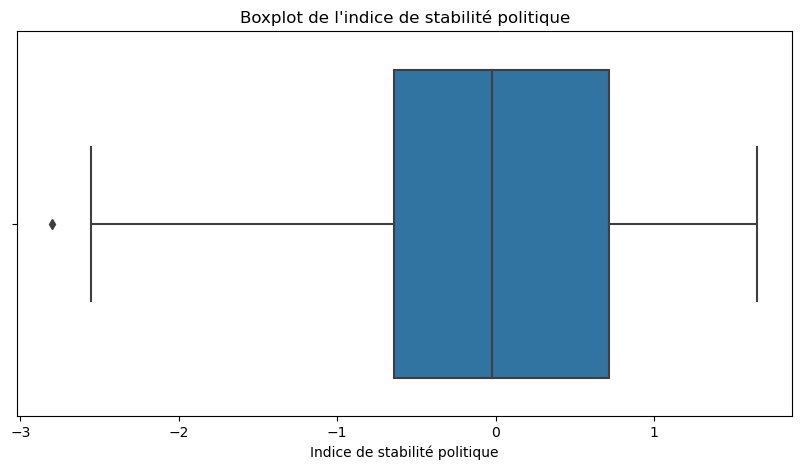

In [165]:
#Représenter la distribution de l'indice de stabilité politique 
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_stabilitepolitique['indice_stabilité_politique'])
plt.title('Boxplot de l\'indice de stabilité politique')
plt.xlabel('Indice de stabilité politique')
plt.show()

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


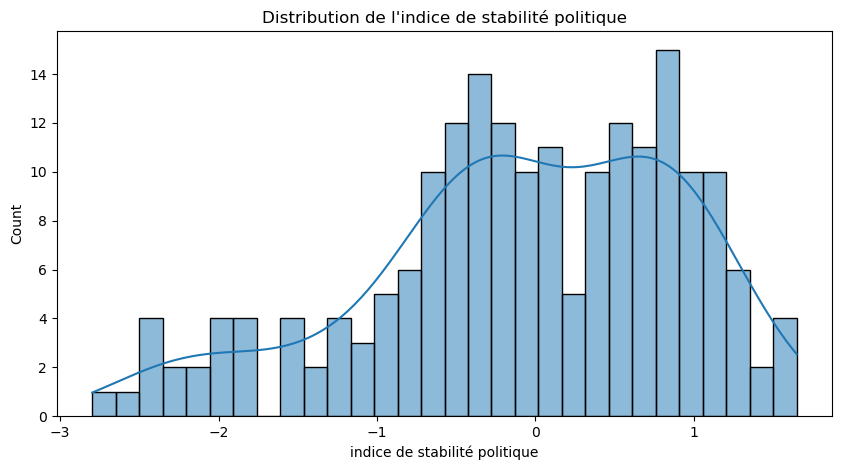

In [166]:
#Représenter la distribution de l'indice de stabilité politique
plt.figure(figsize=(10, 5))
sns.histplot(df_stabilitepolitique['indice_stabilité_politique'], kde=True, bins=30)
plt.title('Distribution de l\'indice de stabilité politique')
plt.xlabel('indice de stabilité politique')
plt.show()

In [167]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_stabilitepolitique['indice_stabilité_politique'].quantile(0.25)
Q3 = df_stabilitepolitique['indice_stabilité_politique'].quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour l'indice de stabilité politique est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_stabilitepolitique[
    (df_stabilitepolitique['indice_stabilité_politique'] < borne_inferieure) |
    (df_stabilitepolitique['indice_stabilité_politique'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_stabilitepolitique.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour l'indice de stabilité politique est : 1.3619134724140172
Borne inférieure : -2.6858748793602003
Borne supérieure : 2.761779010295869
Nombre de valeurs extrêmes : 1
Part des valeurs extrêmes : 0.51%


In [168]:
#Pays avec indice de stabilité politique en valeurs extrêmes
valeurs_extremes[['Pays', 'indice_stabilité_politique']]

,Pays,indice_stabilité_politique
179,Syrian Arab Republic,-2.797252


In [169]:
#Analyser la normalité de la distribution
stabilite_pol = df_stabilitepolitique['indice_stabilité_politique']
W, p = st.shapiro(stabilite_pol)
print(f"W: {W}, p-value: {p}")
def message_normalite(p) :
    if p > 0.05:
        print("La distribution suit une loi normale.")
    else:
        print("La distribution ne suit pas une loi normale.")
message_normalite(p)

W: 0.9589924812316895, p-value: 1.87293208000483e-05
La distribution ne suit pas une loi normale.


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.16 - Analyse exploratoire des catégories de revenus des pays</h3>
<a id="section_2_16"></a>
</div>

In [170]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_categories_revenus.shape[0]))
print("Le tableau comporte {} colonnes".format(df_categories_revenus.shape[1]))

Le tableau comporte 216 lignes
Le tableau comporte 2 colonnes


In [171]:
#Aperçu
df_categories_revenus

,Pays,Groupe_revenus
0,Aruba,Revenu élevé
1,Afghanistan,Faible revenu
2,Angola,"Revenu intermédiaire, tranche inférieure"
3,Albanie,"Revenu intermédiaire, tranche supérieure"
4,Andorre,Revenu élevé
...,...,...
211,Kosovo,"Revenu intermédiaire, tranche supérieure"
212,"Yémen, Rép. du",Faible revenu
213,Afrique du Sud,"Revenu intermédiaire, tranche supérieure"
214,Zambie,"Revenu intermédiaire, tranche inférieure"


In [172]:
#Regarder type de données
print(df_categories_revenus.dtypes)

#Observer si il y a des valeurs manquantes dans chacune des colonnes
nan = df_categories_revenus.isnull().sum()

def message_nan(nan):
    total_nan = nan.sum()
    if total_nan == 0:
        print("Il n'y a pas de valeur manquante.")
    elif total_nan == len(nan) * len(df_categories_revenus):
        print("Il y a des valeurs manquantes dans toutes les colonnes.")
    else:
        missing_columns = nan[nan > 0].index.tolist()
        print(f"Il y a des valeurs manquantes dans les colonnes suivantes : {', '.join(missing_columns)}")
message_nan(nan)

#Regarder si il y a des doublons dans la colonne pays
doublons = df_categories_revenus['Pays'].duplicated()

def message_doublon (doublons):
    if doublons.any() ==False:
        print("Il n'y a pas de doublon.")
    else :
        print("Il y a des doublons dans la colonne.")
message_doublon(doublons)

Pays              object
Groupe_revenus    object
dtype: object
Il n'y a pas de valeur manquante.
Il n'y a pas de doublon.


In [173]:
#Regrouper les 2 modalités de la catégorie revenu intermédiaire en une seule
df_categories_revenus['Groupe_revenus'] = df_categories_revenus['Groupe_revenus'].replace({
    'Revenu intermédiaire, tranche supérieure': 'Revenu intermédiaire',
    'Revenu intermédiaire, tranche inférieure': 'Revenu intermédiaire'
})
print(df_categories_revenus)

               Pays        Groupe_revenus
0             Aruba          Revenu élevé
1       Afghanistan         Faible revenu
2            Angola  Revenu intermédiaire
3           Albanie  Revenu intermédiaire
4           Andorre          Revenu élevé
..              ...                   ...
211          Kosovo  Revenu intermédiaire
212  Yémen, Rép. du         Faible revenu
213  Afrique du Sud  Revenu intermédiaire
214          Zambie  Revenu intermédiaire
215        Zimbabwe  Revenu intermédiaire

[216 rows x 2 columns]


In [174]:
# Afficher les effectifs par catégorie
effectifs_categ = df_categories_revenus['Groupe_revenus'].value_counts()
print(effectifs_categ)

Groupe_revenus
Revenu intermédiaire    105
Revenu élevé             85
Faible revenu            26
Name: count, dtype: int64


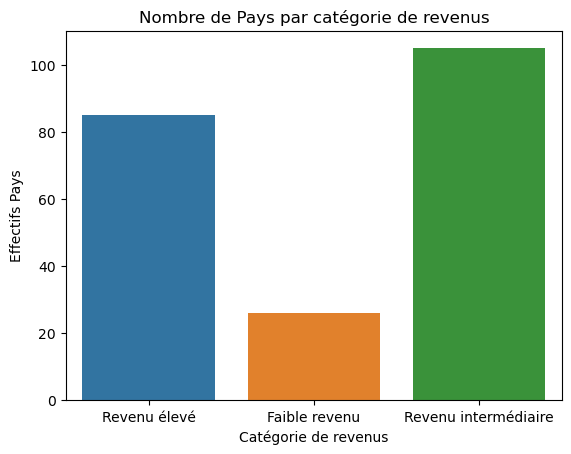

In [175]:
# Visualiser graphiquement
sns.countplot(data=df_categories_revenus, x='Groupe_revenus')
plt.xlabel('Catégorie de revenus')
plt.ylabel('Effectifs Pays')
plt.title('Nombre de Pays par catégorie de revenus')
plt.show()

<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Harmoniser les noms des Pays</h2><a class="anchor" id="Etape_3"></a>
</div>

In [176]:
#faire un dictionnaire des df
dfs = {
    'df1':df_revenuparhabitant,
    'df2':df_croissance_revenuparhabitant,
    'df3':df_taux_croissance,
    'df4':df_business_score,
    'df5':df_commerce_transfontalier,
    'df6':df_droitsdedouane,
    'df7':df_score_logistique,
    'df8':df_population,
    'df9':df_croissance_pop,
    'df10':df_pop_urbaine,
    'df11':df_evol_pop_urbaine,
    'df12':df_esperancedevie,
    'df13':df_volailles,
    'df14':df_healthyfood,
    'df15':df_stabilitepolitique,
    'df16':df_categories_revenus
}

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">3.1 - Créer une table de correspondance entre les dénominations des pays</h3>
<a id="section_3_1"></a>
</div>

In [177]:
# Obtenir la liste des noms de pays uniques dans chaque DataFrame
for key, df in dfs.items():
    pays_uniques = df['Pays'].unique()
    print(f"{key} - Noms de pays uniques : {pays_uniques}")

df1 - Noms de pays uniques : ['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'Antigua and Barbuda'
 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas, The'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil'
 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon'
 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros' 'Cabo Verde'
 'Costa Rica' 'Caribbean small states' 'Curacao' 'Cayman Islands' 'Cyprus'
 'Czechia' 'Germany' 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic'
 'Algeria' 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europe & Central As

In [178]:
#initialiser la liste de pays fixés 
pays_fixes = [
    'Albanie', 'Algerie', 'Angola', 'Armenie', 'Australie', 'Autriche', 'Azerbaidjan', 'Bangladesh', 'Belarus', 
    'Belgique', 'Belize', 'Benin', 'Bhutan', 'Bolivie', 'Bosnie Herzegovine', 'Botswana', 'Bresil', 'Bulgarie', 
    'Burkina Faso', 'Burundi', 'Cap-Vert', 'Cameroun', 'Canada', 'République centrafricaine', 'Tchad', 'Chili', 
    'Chine', 'Colombie', 'RD Congo', 'Congo', 'Costa Rica', 'Cote d\'Ivoire', 'Croatie', 'Chypre', 'Tchequie', 
    'Danemark', 'Djibouti', 'Rep. Dominicaine', 'Equateur', 'Egypte', 'Estonie', 'Eswatini', 'Ethiopie', 'Fiji', 
    'Finlande', 'France', 'Gabon', 'Gambie', 'Allemagne', 'Ghana', 'Grece', 'Grenade', 'Guatemala', 'Guinée', 
    'Guinée-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hongrie', 'Islande', 'Inde', 'Indonesie', 'Iran', 'Irak', 
    'Irlande', 'Israel', 'Italie', 'Jamaique', 'Japon', 'Jordanie', 'Kazakhstan', 'Kenya', 'Corée du Sud', 
    'République Kirghize', 'Laos', 'Lettonie', 'Liban', 'Lesotho', 'Liberia', 'Lituanie', 'Luxembourg', 'Madagascar', 
    'Malawi', 'Malaisie', 'Maldives', 'Mali', 'Malte', 'Mauritanie', 'Maurice', 'Mexique', 'Moldavie', 'Mongolie', 
    'Montenegro', 'Maroc', 'Mozambique', 'Myanmar', 'Namibie', 'Nepal', 'Pays-Bas', 'Nicaragua', 'Niger', 'Nigeria', 
    'Macedoine du Nord', 'Norvège', 'Pakistan', 'Panama', 'Paraguay', 'Perou', 'Philippines', 'Pologne', 'Portugal', 
    'Roumanie', 'Russie', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Serbie', 'Sierra Leone', 'Slovaquie', 
    'Slovenie', 'Afrique du Sud', 'Espagne', 'Sri Lanka', 'Vietnam', 'Sainte-Lucie', 'Soudan', 'Suède', 'Suisse', 
    'Tadjikistan', 'États-Unis', 'Tanzanie', 'Thailande', 'Togo', 'Trinidad et Tobago', 'Tunisie', 'Turquie', 
    'Ouganda', 'Emirats arabes unis', 'Royaume-Uni', 'Uruguay', 'Ouzbekistan', 'Palestine', 'Zambie'
]

In [179]:
#Dictionnaire des variantes existantes
variantes_pays = {
    "Albanie": ["Albanie","Albania"],
    "Algerie": ["Algerie","Algérie", "Algeria"],
    "Angola": ["Angola","angola"],
    "Armenie": ["Armenie","Arménie", "Armenia"],
    "Australie": ["Australie","Australia"],
    "Autriche": [ "Autriche","Austria"],
    "Azerbaidjan": ["Azerbaidjan","Azerbaïdjan", "Azerbaijan"],
    "Bangladesh": ["Bangladesh","bangladesh"],
    "Belarus": ["Belarus", "Bélarus","Biélorussie", "Bielorussie"],
    "Belgique": ["Belgique","Belgium"],
    "Belize": ["Belize", "Bélize","belize"],
    "Benin": ["Benin","Bénin"],
    "Bhutan": ["Bhutan","Bhoutan"],
    "Bolivie": ["Bolivie","Bolivia"],
    "Bosnie Herzegovine": ["Bosnie Herzegovine","Bosnia and Herzegovina","Bosnia Herzegovina", "Bosnie-Herzégovine"],
    "Botswana": ["Botswana","bostwana"],
    "Bresil": ["Bresil","Brazil", "Brésil"],
    "Bulgarie": ["Bulgarie","Bulgaria"],
    "Burkina Faso": ["Burkina Faso","BurkinaFaso"],
    "Burundi": ["Burundi","burundi"],
    "Cap-Vert": ["Cap-Vert", "Cap Vert","Cabo Verde"],
    "Cameroun": ["Cameroun","Cameroon"],
    "Canada": ["Canada","canada"],
    "République centrafricaine": ["République centrafricaine", "Centrafrique","Central African Republic"],
    "Tchad": ["Tchad","Chad"],
    "Chili": ["Chili","Chile"],
    "Chine": ["Chine","China", "Chine, continentale"],
    "Colombie": ["Colombie","Colombia"],
    "RD Congo": ["RD Congo", "RDC","Congo, Dem. Rep.", "République démocratique du Congo"],
    "Congo": ["Congo", "Congo Brazzaville", "Congo, Rep.", "République du Congo"],
    "Costa Rica": ["Costa Rica","costarica"],
    "Cote d'Ivoire": ["Cote d'Ivoire", "Ivory Coast","Côte d’Ivoire", "Cote d'ivoire"],
    "Croatie": ["Croatie","Croatia"],
    "Chypre": ["Chypre","Cyprus"],
    "Tchequie": ["Tchequie","République Tchèque", "Czech Republic","Czechia", "Tchéquie"],
    "Danemark": ["Danemark","Denmark"],
    "Djibouti": ["Djibouti","Jibouti"],
    "Rep. Dominicaine": ["Rep. Dominicaine","Dominican Republic", "République dominicaine"],
    "Equateur": ["Equateur","Ecuador", "Équateur"],
    "Egypte": ["Egypte","Egypt, Arab Rep.", "Égypte"],
    "Estonie": ["Estonie","Estonia"],
    "Eswatini": ["Eswatini", "Swaziland","Es Watini"],
    "Ethiopie": ["Ethiopie","Ethiopia", "Éthiopie"],
    "Fiji": ["Fiji","Fidji"],
    "Finlande": ["Finlande","Finland"],
    "France": ["France","france"],
    "Gabon": ["Gabon","gabon"],
    "Gambie": ["Gambie","Gambia, The", "Gambia"],
    "Allemagne": ["Allemagne","Germany"],
    "Ghana": ["Ghana","ghana"],
    "Grece": ["Grece","Greece", "Grèce"],
    "Grenade": ["Grenade","Grenada"],
    "Guatemala": ["Guatemala","guatemala"],
    "Guinée": ["Guinée","Guinea"],
    "Guinée-Bissau": ["Guinée-Bissau","Guinée Bissau","Guinea-Bissau"],
    "Guyana": ["Guyana","guyana"],
    "Haiti": ["Haiti","Haïti"],
    "Honduras": ["Honduras","honduras"],
    "Hongrie": ["Hongrie","Hungary"],
    "Islande": ["Islande","Iceland"],
    "Inde": ["Inde","India"],
    "Indonesie": ["Indonesie","Indonesia", "Indonésie"],
    "Iran": ["Iran","République islamique d'Iran","Iran, Islamic Rep."],
    "Irak": ["Irak","Iraq"],
    "Irlande": ["Irlande","Ireland"],
    "Israel": ["Israel","Israël"],
    "Italie": ["Italie","Italy"],
    "Jamaique": ["Jamaique","Jamaica", "Jamaïque"],
    "Japon": ["Japon","Japan"],
    "Jordanie": ["Jordanie","Jordan"],
    "Kazakhstan": ["Kazakhstan","kazakstan"],
    "Kenya": ["Kenya","kenya"],
    "Corée du Sud": ["Corée du Sud","South Korea","Korea, Rep.", "Corée, République de"],
    "République Kirghize": ["République Kirghize","Kyrgyz Republic", "République kirghize","Kyrghyztan"],
    "Laos": ["Laos", "RDP Lao","Lao PDR", "République démocratique populaire lao"],
    "Lettonie": ["Lettonie","Latvia"],
    "Liban": ["Liban","Lebanon"],
    "Lesotho": ["Lesotho","lesotho"],
    "Liberia": ["Liberia","Libéria"],
    "Lituanie": ["Lituanie","Lithuania"],
    "Luxembourg": ["Luxembourg","luxembourg"],
    "Madagascar": ["Madagascar","mada"],
    "Malawi": ["Malawi","malawi"],
    "Malaisie": ["Malaisie","Malaysia"],
    "Maldives": ["Maldives","maldives"],
    "Mali": ["Mali","mali"],
    "Malte": ["Malte","Malta"],
    "Mauritanie": ["Mauritanie","Mauritania"],
    "Maurice": ["Maurice","Mauritius"],
    "Mexique": ["Mexique","Mexico"],
    "Moldavie": ["Moldavie","Moldova"],
    "Mongolie": ["Mongolie","Mongolia"],
    "Montenegro": ["Montenegro","Monténégro"],
    "Maroc": ["Maroc","Morocco"],
    "Mozambique": ["Mozambique","mozambique"],
    "Myanmar": ["Myanmar","Malaisie"],
    "Namibie": ["Namibie","Namibia"],
    "Nepal": ["Nepal","Népal"],
    "Pays-Bas": ["Pays-Bas","Netherlands"],
    "Nicaragua": ["Nicaragua","nicaraga"],
    "Niger": ["Niger","niger"],
    "Nigeria": ["Nigeria","Nigéria"],
    "Macedoine du Nord": ["Macedoine du Nord","North Macedonia", "Macédoine du Nord"],
    "Norvège": ["Norvège","Norway", "Norvege"],
    "Pakistan": ["Pakistan","pakistan"],
    "Panama": ["Panama","panama"],
    "Paraguay": ["Paraguay","paraguay"],
    "Perou": ["Perou","Peru", "Pérou"],
    "Philippines": ["Philippines","phillippines"],
    "Pologne": ["Pologne","Poland"],
    "Portugal": ["Portugal","portugal"],
    "Roumanie": ["Roumanie","Romania"],
    "Russie": ["Russie", "Russia","Russian Federation", "Fédération de Russie"],
    "Rwanda": ["Rwanda","rwanda"],
    "Sao Tome and Principe": ["Sao Tome and Principe","Sao Tomé-et-Principe"],
    "Senegal": ["Senegal","Sénégal"],
    "Serbie": ["Serbie","Serbia"],
    "Sierra Leone": ["Sierra-Leone", "Sierra-Léone"],
    "Slovaquie": ["Slovaquie","Slovak Republic", "République slovaque"],
    "Slovenie": ["Slovenie","Slovenia", "Slovénie"],
    "Afrique du Sud": ["Afrique du Sud","South Africa"],
    "Espagne": ["Espagne","Spain"],
    "Sri Lanka": ["Sri Lanka","srilanka"],
    "Vietnam": ["Vietnam","Viet Nam"],
    "Sainte-Lucie": ["Sainte-Lucie","St. Lucia", "Santa Lucia"],
    "Soudan": ["Soudan","Sudan"],
    "Suède": ["Suède","Sweden"],
    "Suisse": ["Suisse","Switzerland"],
    "Tadjikistan": ["Tadjikistan","Tajikistan"],
    "États-Unis": ["États-Unis","USA","US","États-Unis d'Amérique", "United States"],
    "Tanzanie": ["Tanzanie","Tanzania"],
    "Thailande": ["Thailande","Thailand", "Thaïlande"],
    "Togo": ["Togo","togo"],
    "Trinidad et Tobago": ["Trinidad et Tobago","Trinité-et-Tobago", "Trinidad and Tobago"],
    "Tunisie": ["Tunisie","Tunisia"],
    "Turquie": ["Turquie","Turkiye"],
    "Ouganda": ["Ouganda","Uganda"],
    "Emirats arabes unis": ["Emirats arabes unis","United Arab Emirates", "Émirats arabes unis"],
    "Royaume-Uni": ["Royaume-Uni","Royaume Uni","UK","United Kingdom"],
    "Uruguay": ["Uruguay","uruguay"],
    "Ouzbekistan": ["Ouzbekistan","Uzbekistan", "Ouzbékistan"],
    "Palestine": ["Palestine","West Bank and Gaza"],
    "Zambie": ["Zambie","Zambia"]
}

In [180]:
# Créer une liste de tuples (pays_fixes, variantes_pays)
data = []
for pays, variantes in variantes_pays.items():
    for variante in variantes:
        data.append((pays, variante))

# Créer le df de référence
df_reference_pays = pd.DataFrame(data, columns=['Pays_fixés', 'Variante'])
print(df_reference_pays)

      Pays_fixés            Variante
0        Albanie             Albanie
1        Albanie             Albania
2        Algerie             Algerie
3        Algerie             Algérie
4        Algerie             Algeria
..           ...                 ...
336  Ouzbekistan         Ouzbékistan
337    Palestine           Palestine
338    Palestine  West Bank and Gaza
339       Zambie              Zambie
340       Zambie              Zambia

[341 rows x 2 columns]


In [181]:
# Fonction pour normaliser les noms de pays
def normaliser_noms_pays(nom,df_reference_pays):
    match = df_reference_pays[df_reference_pays['Variante'].str.lower()== nom.lower()]
    if not match.empty:
        return match['Pays_fixés'].values[0]
    return nom

print(normaliser_noms_pays('Spain', df_reference_pays))

Espagne


In [182]:
# Fonction pour appliquer la normalisation à la liste des DF
def normaliser_tables(dfs, df_reference_pays):
    for key in dfs.keys():
        dfs[key] = dfs[key].copy()  # Créer une copie pour éviter les modifications sur une vue
        dfs[key]['Pays_corrigé'] = dfs[key]['Pays'].map(lambda nom: normaliser_noms_pays(nom, df_reference_pays))
    return dfs

dfs = normaliser_tables(dfs, df_reference_pays)

for key, df in dfs.items():
    print(f"{key}:\n", df.head())

df1:
                           Pays  GDP_per_capita                 Pays_corrigé
0                        Aruba           45236                        Aruba
1  Africa Eastern and Southern            4294  Africa Eastern and Southern
2                  Afghanistan            2093                  Afghanistan
3   Africa Western and Central            5156   Africa Western and Central
4                       Angola            7929                       Angola
df2:
                           Pays  GDP_per_capita_growth%  \
0                        Aruba               27.696865   
1  Africa Eastern and Southern                1.841882   
2                  Afghanistan              -22.966942   
3   Africa Western and Central                1.385815   
4                       Angola               -1.954598   

                  Pays_corrigé  
0                        Aruba  
1  Africa Eastern and Southern  
2                  Afghanistan  
3   Africa Western and Central  
4                 

In [183]:
def mettre_a_jour_tables(dfs):
    for key in dfs.keys():
        dfs[key] = dfs[key].copy()  # Créer une copie pour éviter les modifications sur une vue
        if 'Pays' in dfs[key].columns and 'Pays_corrigé' in dfs[key].columns:
            dfs[key].drop(columns=['Pays'], inplace=True)
            dfs[key].rename(columns={'Pays_corrigé': 'Pays'}, inplace=True)
        else:
            print(f"Les colonnes 'Pays' ou 'Pays_corrigé' sont manquantes dans le DataFrame {key}.")
    return dfs

dfs = mettre_a_jour_tables(dfs)

In [184]:
#verif des modifications
for key, df in dfs.items():
    print(f"{key}:\n", df.head())

df1:
    GDP_per_capita                         Pays
0           45236                        Aruba
1            4294  Africa Eastern and Southern
2            2093                  Afghanistan
3            5156   Africa Western and Central
4            7929                       Angola
df2:
    GDP_per_capita_growth%                         Pays
0               27.696865                        Aruba
1                1.841882  Africa Eastern and Southern
2              -22.966942                  Afghanistan
3                1.385815   Africa Western and Central
4               -1.954598                       Angola
df3:
    Taux_croissancePIB            Pays
0           -6.240172     Afghanistan
1            4.856402         Albanie
2            3.600000         Algerie
3            1.735016  American Samoa
4            9.563798         Andorra
df4:
    score_facilite_business                 Pays
0                 44.06497          Afghanistan
1                 67.74847              

In [185]:
for key, df in dfs.items():
    print(f"{key}:\n", df.shape)

df1:
 (242, 2)
df2:
 (255, 2)
df3:
 (248, 2)
df4:
 (191, 2)
df5:
 (189, 2)
df6:
 (160, 2)
df7:
 (167, 2)
df8:
 (217, 2)
df9:
 (223, 2)
df10:
 (211, 2)
df11:
 (219, 2)
df12:
 (209, 2)
df13:
 (188, 7)
df14:
 (146, 2)
df15:
 (196, 2)
df16:
 (216, 2)


In [186]:
# Réassigner les df d'origine après les modifications
df_revenuparhabitant = dfs['df1']
df_croissance_revenuparhabitant = dfs['df2']
df_taux_croissance = dfs['df3']
df_business_score = dfs['df4']
df_commerce_transfontalier = dfs['df5']
df_droitsdedouane = dfs['df6']
df_score_logistique = dfs['df7']
df_population = dfs['df8']
df_croissance_pop = dfs['df9']
df_pop_urbaine = dfs['df10']
df_evol_pop_urbaine = dfs['df11']
df_esperancedevie = dfs['df12']
df_volailles = dfs['df13']
df_healthyfood = dfs['df14']
df_stabilitepolitique = dfs['df15']
df_categories_revenus = dfs['df16']

In [187]:
print(dfs.keys())

dict_keys(['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10', 'df11', 'df12', 'df13', 'df14', 'df15', 'df16'])


<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Fusion des fichiers</h2><a class="anchor" id="Etape_4"></a>
</div>

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.1 - Fusion de 2 tables et calcul de nouvelles variables</h3>
<a id="section_4_1"></a>
</div>

In [188]:
df_volailles_pop = pd.merge(df_volailles, df_population, on='Pays', how='inner', indicator=True)

In [189]:
df_volailles_pop.head(5)
df_volailles_pop.shape

(148, 9)

In [190]:
# Vérifier s'il y a des doublons dans la colonne 'Pays'
doublons = df_volailles['Pays'].duplicated().any()

if doublons:
    print("Il y a des doublons dans la colonne 'Pays'.")
else:
    print("Il n'y a pas de doublons dans la colonne 'Pays'.")
# Trouver les doublons dans la colonne 'Pays'
doublons = df_volailles[df_volailles['Pays'].duplicated()]['Pays']

# Afficher les noms de pays apparaissant en double
pays_doublons = doublons.value_counts()
print("Noms de pays apparaissant en double :")
print(pays_doublons)

Il n'y a pas de doublons dans la colonne 'Pays'.
Noms de pays apparaissant en double :
Series([], Name: count, dtype: int64)


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.1.1 - Calcul de nouvelles variables</h3>
<a id="sub_section_4_1_1"></a>
</div>

la colonne Exportations comportant 51 valeurs manquantes, nous ne l'utiliserons malheureusement pas pour calculer la balance commerciale pour 100k habitant:  (export-import)/ pop *100000.

Nous optons pour :
+ Taux d'importation de volailles pour 100 000 habitant : (Importation quantités / Population)* 100 000
+ Part volailles importée : Importations quantité * 100 / nourriture quantité
+ Taux de production de volailles pour 100 000 habitants : (production en quantité/ Population)* 100 000

In [191]:
#Ajouter colonne importations de volailles pour 100 000 hab 
df_volailles_pop['importVolailles_pour100khab'] = (df_volailles_pop['Importations - quantité - 1000 t']/df_volailles_pop['Population'])*100000
df_volailles_pop.head(5)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité - 1000 t,Importations - quantité - 1000 t,Nourriture - 1000 t,Production - 1000 t,Pays,Population,_merge,importVolailles_pour100khab
0,3.29,0.87,NaN,7.0,36.0,29.0,Afghanistan,42239854,both,0.016572
1,149.24,39.57,50.0,304.0,2370.0,1958.0,Afrique du Sud,60414495,both,0.503191
2,85.67,22.56,NaN,47.0,64.0,18.0,Albanie,2745972,both,1.711598
3,23.14,6.13,0.0,0.0,275.0,275.0,Algerie,45606480,both,0.000000
4,60.85,16.51,664.0,789.0,1376.0,1507.0,Allemagne,84482267,both,0.933924


In [192]:
#Nouvelle colonne calculée : proportion d'importation dans la nourriture
df_volailles_pop['Part_volailles_importée'] = (df_volailles_pop['Importations - quantité - 1000 t'] * 100) / df_volailles_pop['Nourriture - 1000 t']
df_volailles_pop.head(5)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité - 1000 t,Importations - quantité - 1000 t,Nourriture - 1000 t,Production - 1000 t,Pays,Population,_merge,importVolailles_pour100khab,Part_volailles_importée
0,3.29,0.87,NaN,7.0,36.0,29.0,Afghanistan,42239854,both,0.016572,19.444444
1,149.24,39.57,50.0,304.0,2370.0,1958.0,Afrique du Sud,60414495,both,0.503191,12.827004
2,85.67,22.56,NaN,47.0,64.0,18.0,Albanie,2745972,both,1.711598,73.437500
3,23.14,6.13,0.0,0.0,275.0,275.0,Algerie,45606480,both,0.000000,0.000000
4,60.85,16.51,664.0,789.0,1376.0,1507.0,Allemagne,84482267,both,0.933924,57.340116


In [193]:
#Nouvelle colonne taux autosuffisance alimentaire : (production / nourriture)*100
df_volailles_pop['Production_Volailles_100Khab'] = (df_volailles_pop['Production - 1000 t'] / df_volailles_pop['Population'])*100000
df_volailles_pop.head(5)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité - 1000 t,Importations - quantité - 1000 t,Nourriture - 1000 t,Production - 1000 t,Pays,Population,_merge,importVolailles_pour100khab,Part_volailles_importée,Production_Volailles_100Khab
0,3.29,0.87,NaN,7.0,36.0,29.0,Afghanistan,42239854,both,0.016572,19.444444,0.068656
1,149.24,39.57,50.0,304.0,2370.0,1958.0,Afrique du Sud,60414495,both,0.503191,12.827004,3.240944
2,85.67,22.56,NaN,47.0,64.0,18.0,Albanie,2745972,both,1.711598,73.437500,0.655506
3,23.14,6.13,0.0,0.0,275.0,275.0,Algerie,45606480,both,0.000000,0.000000,0.602984
4,60.85,16.51,664.0,789.0,1376.0,1507.0,Allemagne,84482267,both,0.933924,57.340116,1.783806


In [194]:
#Regarder les infos du dataset fusionné
df_volailles_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)          148 non-null    float64 
 1   Disponibilité alimentaire en quantité (kg/personne/an)  148 non-null    float64 
 2   Exportations - quantité - 1000 t                        111 non-null    float64 
 3   Importations - quantité - 1000 t                        148 non-null    float64 
 4   Nourriture - 1000 t                                     148 non-null    float64 
 5   Production - 1000 t                                     146 non-null    float64 
 6   Pays                                                    148 non-null    object  
 7   Population                                              148 non-null    int32   
 8   _merge                        

Regardons les quelques valeurs manquantes dans nos variables calculées : Part_Volailles_importée et Autosuffisance_alimentaire_volailles
- Pour la valeur exportations, il reste 25% de valeurs manquantes, je décide de me passer de ces informations et de supprimer cette colonne.

In [195]:
# Afficher la ligne contenant la valeur manquante initiale
ligne_manquante = df_volailles_pop[df_volailles_pop['Part_volailles_importée'].isnull()]
ligne_manquante

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité - 1000 t,Importations - quantité - 1000 t,Nourriture - 1000 t,Production - 1000 t,Pays,Population,_merge,importVolailles_pour100khab,Part_volailles_importée,Production_Volailles_100Khab
136,160.48,42.35,NaN,0.0,0.0,0.0,Tuvalu,11396,both,0.0,NaN,0.0


Il s'agit d'un micro-état du pacifique pour lequel il manque les données. Au regard de la distance avec la France et de la population très faible. Ce pays ne pourra pas faire partie des pays à cibler pour l'export. Par conséquent, nous pouvons le retirer du dataset dès à présent.
Parallèlement, au regard des valeurs manquantes de la colonne exportations, je décide de retirer cette colonne et de ne pas l'utiliser dans une nouvelle variable "balance commerciale" comme initialement envisagé. Enfin les colonnes importations/Nourriture/Production/_merge ne nous serons plus utiles et je décide de les retirer.

In [196]:
# Afficher la ligne contenant la valeur manquante initiale
ligne_manquante = df_volailles_pop[df_volailles_pop['Production_Volailles_100Khab'].isnull()]
ligne_manquante

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Exportations - quantité - 1000 t,Importations - quantité - 1000 t,Nourriture - 1000 t,Production - 1000 t,Pays,Population,_merge,importVolailles_pour100khab,Part_volailles_importée,Production_Volailles_100Khab
35,15.15,3.99,NaN,4.0,4.0,NaN,Djibouti,1136455,both,0.351972,100.000000,NaN
79,83.45,21.80,NaN,18.0,11.0,NaN,Maldives,521020,both,3.454762,163.636364,NaN


Nous retirons les Maldives et Djibouti qui, par leur taille et leur distance à la France ne peuvent pas constituer, raisonnablement, une cible pour l'export. D'autant plus que les Maldives ont une part de volailles importée extrême par rapport à leur nourriture (163%).

In [197]:
colonnes_a_supprimer = ['Exportations - quantité - 1000 t', 'Importations - quantité - 1000 t', 'Nourriture - 1000 t', 'Production - 1000 t', '_merge']
# Supprimer les colonnes
df_volailles_pop = df_volailles_pop.drop(columns=colonnes_a_supprimer)
# Supprimer la ligne 136 /35 /79
df_volailles_pop = df_volailles_pop.drop(index=[35, 79,136])
df_volailles_pop.head(5)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Pays,Population,importVolailles_pour100khab,Part_volailles_importée,Production_Volailles_100Khab
0,3.29,0.87,Afghanistan,42239854,0.016572,19.444444,0.068656
1,149.24,39.57,Afrique du Sud,60414495,0.503191,12.827004,3.240944
2,85.67,22.56,Albanie,2745972,1.711598,73.437500,0.655506
3,23.14,6.13,Algerie,45606480,0.000000,0.000000,0.602984
4,60.85,16.51,Allemagne,84482267,0.933924,57.340116,1.783806


Vérifions s'il y a bien 3 lignes de moins (=145)

In [198]:
df_volailles_pop.shape

(145, 7)

In [199]:
#Regarder rapidement les mesures de dispersion de nos nouvelles colonnes
df_volailles_pop.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Population,importVolailles_pour100khab,Part_volailles_importée,Production_Volailles_100Khab
count,145.000000,145.000000,1.450000e+02,145.000000,145.000000,145.000000
mean,84.410966,22.077034,5.021957e+07,0.970163,41.022672,1.683315
std,66.956629,17.567632,1.713393e+08,1.563797,40.680876,1.770817
min,1.490000,0.400000,1.278000e+04,0.000000,0.000000,0.000000
25%,27.110000,7.180000,2.825544e+06,0.036155,4.273504,0.208077
50%,74.870000,19.540000,1.052535e+07,0.402857,27.606178,1.243423
75%,112.590000,29.800000,3.435272e+07,1.178724,75.000000,2.513770
max,342.250000,90.610000,1.428628e+09,8.350886,163.492063,7.452465


In [200]:
#A noter que certains pays semblent importer davantage qu'ils ne consomment de volailles. Regardons leur nombre et quels sont-ils?
pays_import_sup_conso = df_volailles_pop[df_volailles_pop['Part_volailles_importée'] > 100]['Pays']
pays_import_sup_conso

11                Belgique
47                 Grenade
50                  Guinée
74              Luxembourg
84              Mauritanie
90                 Namibie
97                    Oman
115                  Samoa
119              Slovaquie
144    Emirats arabes unis
Name: Pays, dtype: object

A ce stade, gardons en tête cette situation et attendons la fusion complète des tables pour voir combien il en reste.

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.2 - Fusion de toutes les autres tables</h3>
<a id="section_4_2"></a>
</div>

In [201]:
#faire une liste des df
dfs2 = [df_volailles_pop, df_revenuparhabitant,df_croissance_revenuparhabitant,df_taux_croissance,df_business_score, df_commerce_transfontalier,df_droitsdedouane,df_score_logistique,df_croissance_pop,
df_pop_urbaine,df_esperancedevie,df_healthyfood,df_stabilitepolitique,df_categories_revenus
]

J'ai retiré le df_evol_pop_urbaine afin de garder l'Inde dans mon dataset pour assurer d'avoir au moins 60% de la population mondiale de représentée. 

In [202]:
# Joindre toutes les tables sur la colonne 'Pays' en jointure interne
df_complet = dfs2[0]
for df in dfs2[1:]:
    df_complet = df_complet.merge(df, on='Pays', how='inner')
df_complet.tail(5)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Pays,Population,importVolailles_pour100khab,Part_volailles_importée,Production_Volailles_100Khab,GDP_per_capita,GDP_per_capita_growth%,Taux_croissancePIB,score_facilite_business,Trading_accross_borders,taux_droits_douane,Score_performance_logistique,Croissance_pop (%),part_pop_urbaine%,Esperance_vie_naissance (années),Absence_acces_alimentation_saine (%pop),indice_stabilité_politique,Groupe_revenus
100,58.54,14.95,Vietnam,98858950,0.273116,18.392371,1.263416,14051,1.691633,8.123514,69.76594,70.82859,1.17,3.27,0.682173,39.480,74.580000,9.4,-0.030565,Revenu intermédiaire
101,18.58,4.94,Zambie,20569737,0.277106,57.575758,0.247937,3865,3.259458,5.249622,66.93648,56.87656,4.81,2.53,2.720528,46.335,61.803000,81.7,0.102314,Revenu intermédiaire
102,208.40,55.25,Emirats arabes unis,9516871,6.703884,122.222222,0.556906,78915,3.487215,7.850418,80.75261,74.10464,2.63,3.96,0.799055,87.779,79.196000,2.3,0.700785,Revenu élevé
103,108.60,28.78,Equateur,18190484,0.005497,0.193050,2.842145,15117,8.527937,6.186139,57.72270,71.15372,4.63,2.88,1.047129,64.792,77.894000,25.9,-0.239295,Revenu intermédiaire
104,198.23,53.54,États-Unis,334914895,0.057029,1.054608,6.577790,77247,5.633868,1.935496,83.99668,92.01404,1.47,3.89,0.491925,83.298,77.434146,2.5,-0.036005,Revenu élevé


<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Vérification du dataset complet</h2><a class="anchor" id="Etape_5"></a>
</div>

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">5.1 - Exploration du dataset complet</h3>
<a id="section_5_1"></a>
</div>

In [203]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(df_complet.shape[0]))
print("Le tableau comporte {} colonnes".format(df_complet.shape[1]))

Le tableau comporte 105 lignes
Le tableau comporte 20 colonnes


In [204]:
# Vérifier s'il y a des doublons dans la colonne 'Pays'
doublons = df_complet['Pays'].duplicated().any()

if doublons:
    print("Il y a des doublons dans la colonne 'Pays'.")
else:
    print("Il n'y a pas de doublons dans la colonne 'Pays'.")
# Trouver les doublons dans la colonne 'Pays'
doublons = df_complet[df_complet['Pays'].duplicated()]['Pays']

# Afficher les noms de pays apparaissant en double
pays_doublons = doublons.value_counts()
print("Noms de pays apparaissant en double :")
print(pays_doublons)

Il n'y a pas de doublons dans la colonne 'Pays'.
Noms de pays apparaissant en double :
Series([], Name: count, dtype: int64)


In [205]:
# Vérifier les valeurs manquantes par colonne
valeurs_manquantes = df_complet.isnull().sum()

# Afficher les résultats
print(valeurs_manquantes)

Disponibilité alimentaire (Kcal/personne/jour)            0
Disponibilité alimentaire en quantité (kg/personne/an)    0
Pays                                                      0
Population                                                0
importVolailles_pour100khab                               0
Part_volailles_importée                                   0
Production_Volailles_100Khab                              0
GDP_per_capita                                            0
GDP_per_capita_growth%                                    0
Taux_croissancePIB                                        0
score_facilite_business                                   0
Trading_accross_borders                                   0
taux_droits_douane                                        0
Score_performance_logistique                              0
Croissance_pop (%)                                        0
part_pop_urbaine%                                         0
Esperance_vie_naissance (années)        

In [206]:
df_complet.dtypes

Disponibilité alimentaire (Kcal/personne/jour)            float64
Disponibilité alimentaire en quantité (kg/personne/an)    float64
Pays                                                       object
Population                                                  int32
importVolailles_pour100khab                               float64
Part_volailles_importée                                   float64
Production_Volailles_100Khab                              float64
GDP_per_capita                                              int32
GDP_per_capita_growth%                                    float64
Taux_croissancePIB                                        float64
score_facilite_business                                   float64
Trading_accross_borders                                   float64
taux_droits_douane                                        float64
Score_performance_logistique                              float64
Croissance_pop (%)                                        float64
part_pop_u

In [207]:
df_complet.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Population,importVolailles_pour100khab,Part_volailles_importée,Production_Volailles_100Khab,GDP_per_capita,GDP_per_capita_growth%,Taux_croissancePIB,score_facilite_business,Trading_accross_borders,taux_droits_douane,Score_performance_logistique,Croissance_pop (%),part_pop_urbaine%,Esperance_vie_naissance (années),Absence_acces_alimentation_saine (%pop),indice_stabilité_politique
count,105.000000,105.000000,1.050000e+02,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,81.327048,21.167619,6.145530e+07,0.659152,34.944874,1.976430,30400.685714,4.963992,4.913543,67.350182,77.004400,4.392095,2.945238,1.140563,60.725819,72.906015,30.160000,-0.052439
std,60.620942,15.789485,1.993103e+08,0.884463,37.924989,1.869463,29184.945140,4.468189,6.654572,11.417777,19.499412,3.830952,0.564944,1.143411,20.860077,7.715411,26.942416,0.799916
min,2.480000,0.660000,3.936000e+05,0.000000,0.000000,0.000000,918.000000,-12.629477,-7.346764,41.288380,18.964110,0.000000,2.050000,-1.148418,14.784000,53.036000,0.400000,-2.479409
25%,29.400000,7.810000,4.862989e+06,0.028379,1.886792,0.309262,6820.000000,2.696256,2.549956,59.960170,64.272980,1.390000,2.530000,0.292221,46.189000,67.256000,5.800000,-0.531039
50%,73.570000,19.220000,1.133297e+07,0.383717,18.392371,1.658739,21056.000000,4.588192,4.143562,69.603100,78.119370,2.630000,2.810000,1.047129,60.218000,74.424878,19.600000,0.027062
75%,111.890000,29.290000,3.668585e+07,0.934012,57.340116,2.994536,46721.000000,7.289650,5.759543,76.618640,94.248430,7.300000,3.310000,2.127508,77.765000,79.029268,54.900000,0.614759
max,263.980000,70.830000,1.428628e+09,6.703884,163.492063,7.452465,146457.000000,18.908982,63.439864,85.288560,100.000000,17.690000,4.200000,4.077010,98.189000,83.996341,93.600000,1.262935


In [208]:
#Renouveler le contrôle des pays restant qui importe >100% de leur consommation en nourriture : 
#A noter que certains pays semblent importer davantage qu'ils ne consomment de volailles. Regardons leur nombre et quels sont-ils?
pays_import_sup_conso = df_complet[df_complet['Part_volailles_importée'] > 100]['Pays']
pays_import_sup_conso

9                 Belgique
36                  Guinée
55              Luxembourg
64              Mauritanie
87               Slovaquie
102    Emirats arabes unis
Name: Pays, dtype: object

Est-ce une politique d'export, est-ce conjoncturel pour assurer une disponibilité en toute saison, est-ce à cause de la présence d'une forte industrie de transformation et que l'on importe la matière première ? Il sera éventuellement utile de revenir aux données brutes après la réduction de dimension et la classification si nécessaire.

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


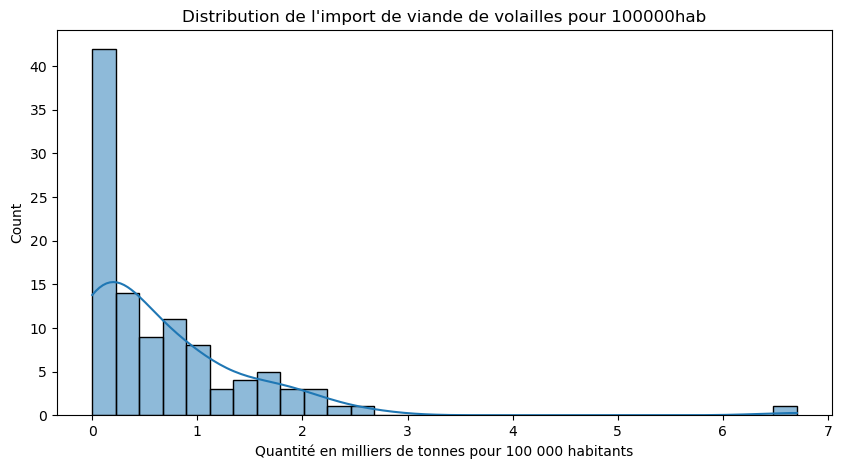

In [209]:
#Représenter la distribution de l'import volailles
plt.figure(figsize=(10, 5))
sns.histplot(df_complet['importVolailles_pour100khab'], kde=True, bins=30)
plt.title('Distribution de l\'import de viande de volailles pour 100000hab')
plt.xlabel('Quantité en milliers de tonnes pour 100 000 habitants')
plt.show()

In [210]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_complet['importVolailles_pour100khab'].quantile(0.25)
Q3 = df_complet['importVolailles_pour100khab'].quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour l'import de volailles pour 100k habitants est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_complet[
    (df_complet['importVolailles_pour100khab'] < borne_inferieure) |
    (df_complet['importVolailles_pour100khab'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_complet.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour l'import de volailles pour 100k habitants est : 0.905632140182051
Borne inférieure : -1.3300687142602892
Borne supérieure : 2.2924598464679145
Nombre de valeurs extrêmes : 3
Part des valeurs extrêmes : 2.86%


In [211]:
#Pays en valeurs extrêmes
valeurs_extremes[['Pays', 'importVolailles_pour100khab']]

,Pays,importVolailles_pour100khab
9,Belgique,2.613640
52,Lettonie,2.444533
102,Emirats arabes unis,6.703884


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


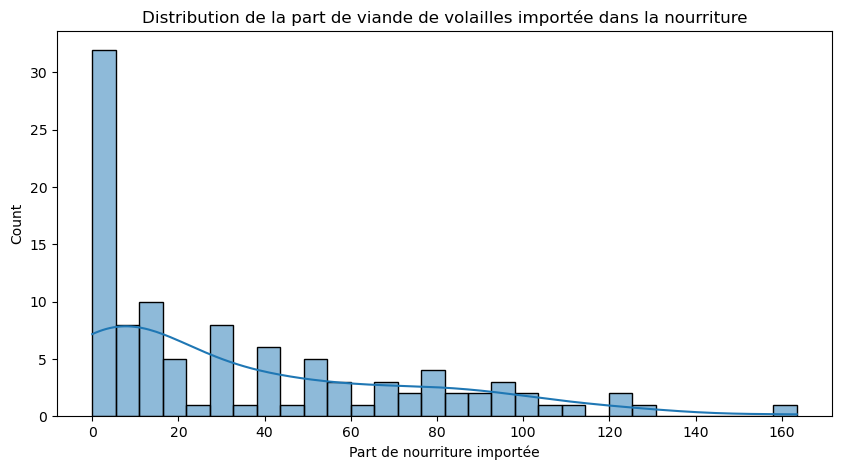

In [212]:
#Représenter la distribution de la part de nourriture importée
plt.figure(figsize=(10, 5))
sns.histplot(df_complet['Part_volailles_importée'], kde=True, bins=30)
plt.title('Distribution de la part de viande de volailles importée dans la nourriture')
plt.xlabel('Part de nourriture importée')
plt.show()

In [213]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_complet['Part_volailles_importée'].quantile(0.25)
Q3 = df_complet['Part_volailles_importée'].quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour la part de nourriture importée est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_complet[
    (df_complet['Part_volailles_importée'] < borne_inferieure) |
    (df_complet['Part_volailles_importée'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_complet.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour la part de nourriture importée est : 55.45332382623958
Borne inférieure : -81.29319328652919
Borne supérieure : 140.52010201842916
Nombre de valeurs extrêmes : 1
Part des valeurs extrêmes : 0.95%


In [214]:
#Pays en valeurs extrêmes
valeurs_extremes[['Pays', 'Part_volailles_importée']]

,Pays,Part_volailles_importée
9,Belgique,163.492063


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


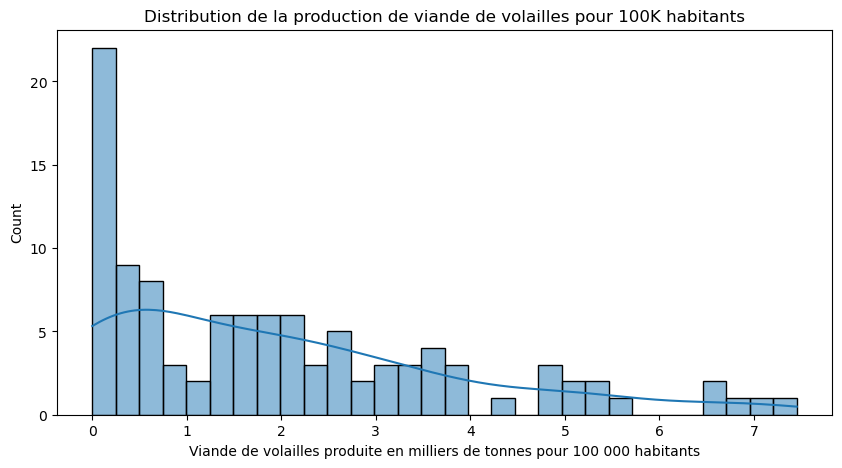

In [215]:
#Représenter la distribution de la production de volailles pour 100k habitants
plt.figure(figsize=(10, 5))
sns.histplot(df_complet['Production_Volailles_100Khab'], kde=True, bins=30)
plt.title('Distribution de la production de viande de volailles pour 100K habitants')
plt.xlabel('Viande de volailles produite en milliers de tonnes pour 100 000 habitants')
plt.show()

In [216]:
#Observer les valeurs extrêmes en déterminant l'IQR
Q1 = df_complet['Production_Volailles_100Khab'].quantile(0.25)
Q3 = df_complet['Production_Volailles_100Khab'].quantile(0.75)
IQR = Q3 - Q1
print(f"L'intervalle interquartile IQR pour la part de nourriture importée est : {IQR}")

# Calcul des bornes inférieure et supérieure
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure}")
print(f"Borne supérieure : {borne_superieure}")

# Considérer les valeurs extrêmes
valeurs_extremes = df_complet[
    (df_complet['Production_Volailles_100Khab'] < borne_inferieure) |
    (df_complet['Production_Volailles_100Khab'] > borne_superieure)
]
nombre_valeurs_extremes = valeurs_extremes.shape[0]
print(f"Nombre de valeurs extrêmes : {nombre_valeurs_extremes}")
nombre_total_valeurs = df_complet.shape[0]

# Calculer la part des valeurs extrêmes
part_valeurs_extremes = (nombre_valeurs_extremes / nombre_total_valeurs) * 100
print(f"Part des valeurs extrêmes : {part_valeurs_extremes:.2f}%")

L'intervalle interquartile IQR pour la part de nourriture importée est : 2.6852739206309444
Borne inférieure : -3.7186484376339464
Borne supérieure : 7.022447244889831
Nombre de valeurs extrêmes : 1
Part des valeurs extrêmes : 0.95%


In [217]:
#Pays en valeurs extrêmes
valeurs_extremes[['Pays', 'Production_Volailles_100Khab']]

,Pays,Production_Volailles_100Khab
78,Pologne,7.452465


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">5.2 - Vérification de la couverture de l'échantillon</h3>
<a id="section_5_2"></a>
</div>

Afin de réaliser une analyse de données et une classification dans une seconde partie, il faut que notre dataset comporte au moins 100 pays et couvre au minimum 60% de la population mondiale. Notre dataset inclut 105 pays. Voyons quelle proportion de la population mondiale est comprise.

In [218]:
# Calculer la somme de la colonne 'population'
somme_population = df_complet['Population'].sum()
population_totale = 8100000000
#estimation 2024 ONU
proportion = somme_population / population_totale
print(f"La proportion de la somme de la colonne 'population' par rapport à la population entière est : {proportion:.2%}")

La proportion de la somme de la colonne 'population' par rapport à la population entière est : 79.66%


In [219]:
#export du df en csv pour continuer l'analyse en partie 2
df_complet.to_csv('df_complet.csv', index=False)

### Nous allons passer à la seconde partie de cette étude de marché dans un second notebook.